In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
DB_PATH = os.path.join('/Users', 'ck-intosh','Downloads', 'COMP_DL', 'Proj_2', 'train')
LABEL_PATH = os.path.join('/Users', 'ck-intosh', 'Downloads', 'COMP_DL', 'Proj_2', 'labels.csv')

In [3]:
labels_df = pd.read_csv(LABEL_PATH, index_col=0)
labels = sorted(list(set(labels_df.breed)))

labels_map = {labels[i]:i for i in range(len(labels))}
labels_map_rev = {i:labels[i] for i in range(len(labels))}
print(labels_map)

NUM_CLASS = len(labels)

class_to_num = dict(zip(labels, range(NUM_CLASS)))

IMG_SIZE = 128
NUM_CHANNELS = 3

{'affenpinscher': 0, 'afghan_hound': 1, 'african_hunting_dog': 2, 'airedale': 3, 'american_staffordshire_terrier': 4, 'appenzeller': 5, 'australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'bedlington_terrier': 10, 'bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'border_collie': 16, 'border_terrier': 17, 'borzoi': 18, 'boston_bull': 19, 'bouvier_des_flandres': 20, 'boxer': 21, 'brabancon_griffon': 22, 'briard': 23, 'brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'cardigan': 27, 'chesapeake_bay_retriever': 28, 'chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'curly-coated_retriever': 34, 'dandie_dinmont': 35, 'dhole': 36, 'dingo': 37, 'doberman': 38, 'english_foxhound': 39, 'english_setter': 40, 'english_springer': 41, 'entlebucher': 42, 'eskimo_dog': 43, 'flat-coated_retriever': 44, 'french_bulldog': 45, 'german_shepherd': 46, 'german_short-haired_pointer': 47, 'gian

In [4]:
def get_abs_img_path(img, dir):
  return os.path.join(DB_PATH, dir, img)

IMG_PATHS = []

ims = os.listdir(DB_PATH)
ims = [x for x in ims if x[0] != '.']

IMG_PATHS += list(map(get_abs_img_path, ims, [DB_PATH] * len(ims)))

print(f"\n+ {'Total Img':<10}:", len(IMG_PATHS))


+ Total Img : 10222


In [5]:
VAL_IMG_PATHS = []
TRAIN_IMG_PATHS = []

limit = 10

img_count_recorder = [0] * len(labels)

for img_path in IMG_PATHS:
    str_file = os.path.splitext(''+os.path.basename(img_path))[0]
    str_v = labels_df.loc[str_file].values[0]
    index = labels_map[str_v]
    if (img_count_recorder[index] < limit):
        VAL_IMG_PATHS.append(img_path)
    else :
        TRAIN_IMG_PATHS.append(img_path)
    img_count_recorder[index] += 1

print(img_count_recorder)
print("IMG in train : " , len(TRAIN_IMG_PATHS))
print("IMG in Vald  : " , len(VAL_IMG_PATHS))

[80, 116, 86, 107, 74, 78, 102, 110, 82, 105, 89, 114, 77, 102, 85, 85, 72, 91, 75, 87, 86, 75, 67, 66, 73, 75, 106, 76, 83, 71, 93, 80, 74, 87, 72, 89, 76, 80, 74, 86, 83, 75, 115, 66, 72, 70, 69, 75, 69, 67, 81, 75, 111, 82, 82, 91, 88, 82, 78, 101, 92, 105, 81, 86, 82, 67, 71, 84, 99, 106, 90, 81, 73, 117, 80, 102, 79, 78, 91, 83, 95, 78, 87, 69, 96, 75, 92, 111, 94, 72, 88, 76, 84, 99, 109, 86, 82, 126, 88, 76, 112, 95, 90, 71, 79, 79, 72, 78, 69, 107, 80, 79, 70, 69, 85, 79, 81, 95, 82, 82]
IMG in train :  9022
IMG in Vald  :  1200


In [6]:
def load_dataset(img_list):
    x_data, y_data = [], []
    for img_path in img_list:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        x_data.append(np.array(img).astype("float32"))
        img_name = img_path.split(os.path.sep)[-1].split('.')[0]
        class_id = class_to_num[labels_df.loc[img_name].breed]
        y_data.append(class_id)
    x_data = np.array(x_data)
    y_data = tf.keras.utils.to_categorical(y_data, num_classes=NUM_CLASS)
    
    x_data_aug, y_data_aug = shuffle(x_data, y_data)
    return x_data_aug, y_data_aug

In [7]:
# def load_dataset(img_list):
#     datagen = ImageDataGenerator(
#         rescale=1./255,
#         # rotation_range=20, 
#         # width_shift_range=0.2, 
#         # height_shift_range=0.2, 
#         # shear_range=0.2, 
#         # zoom_range=0.2, 
#         # horizontal_flip=True, 
#         #vertical_flip=True, 
#         #fill_mode='nearest',
#     )
#     x_data, y_data = [], []
#     for img_path in img_list:
#         img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
#         x_data.append(np.array(img).astype("float32"))
#         img_name = img_path.split(os.path.sep)[-1].split('.')[0]
#         class_id = class_to_num[labels_df.loc[img_name].breed]
#         y_data.append(class_id)
#     x_data = np.array(x_data)
#     y_data = tf.keras.utils.to_categorical(y_data, num_classes=NUM_CLASS)
    
#     gen = datagen.flow(x_data, y_data, batch_size=len(img_list))
#     x_data_aug, y_data_aug = gen.next()
#     x_data_aug, y_data_aug = shuffle(x_data_aug, y_data_aug)
#     return x_data_aug, y_data_aug

In [8]:
x_train, y_train = load_dataset(TRAIN_IMG_PATHS)
print("Train : IMG", x_train.shape)
print("Train : LB ", y_train.shape)

x_val, y_val = load_dataset(VAL_IMG_PATHS)
print("Val : IMG", x_val.shape)
print("Val : LB ", y_val.shape)

Train : IMG (9022, 128, 128, 3)
Train : LB  (9022, 120)
Val : IMG (1200, 128, 128, 3)
Val : LB  (1200, 120)


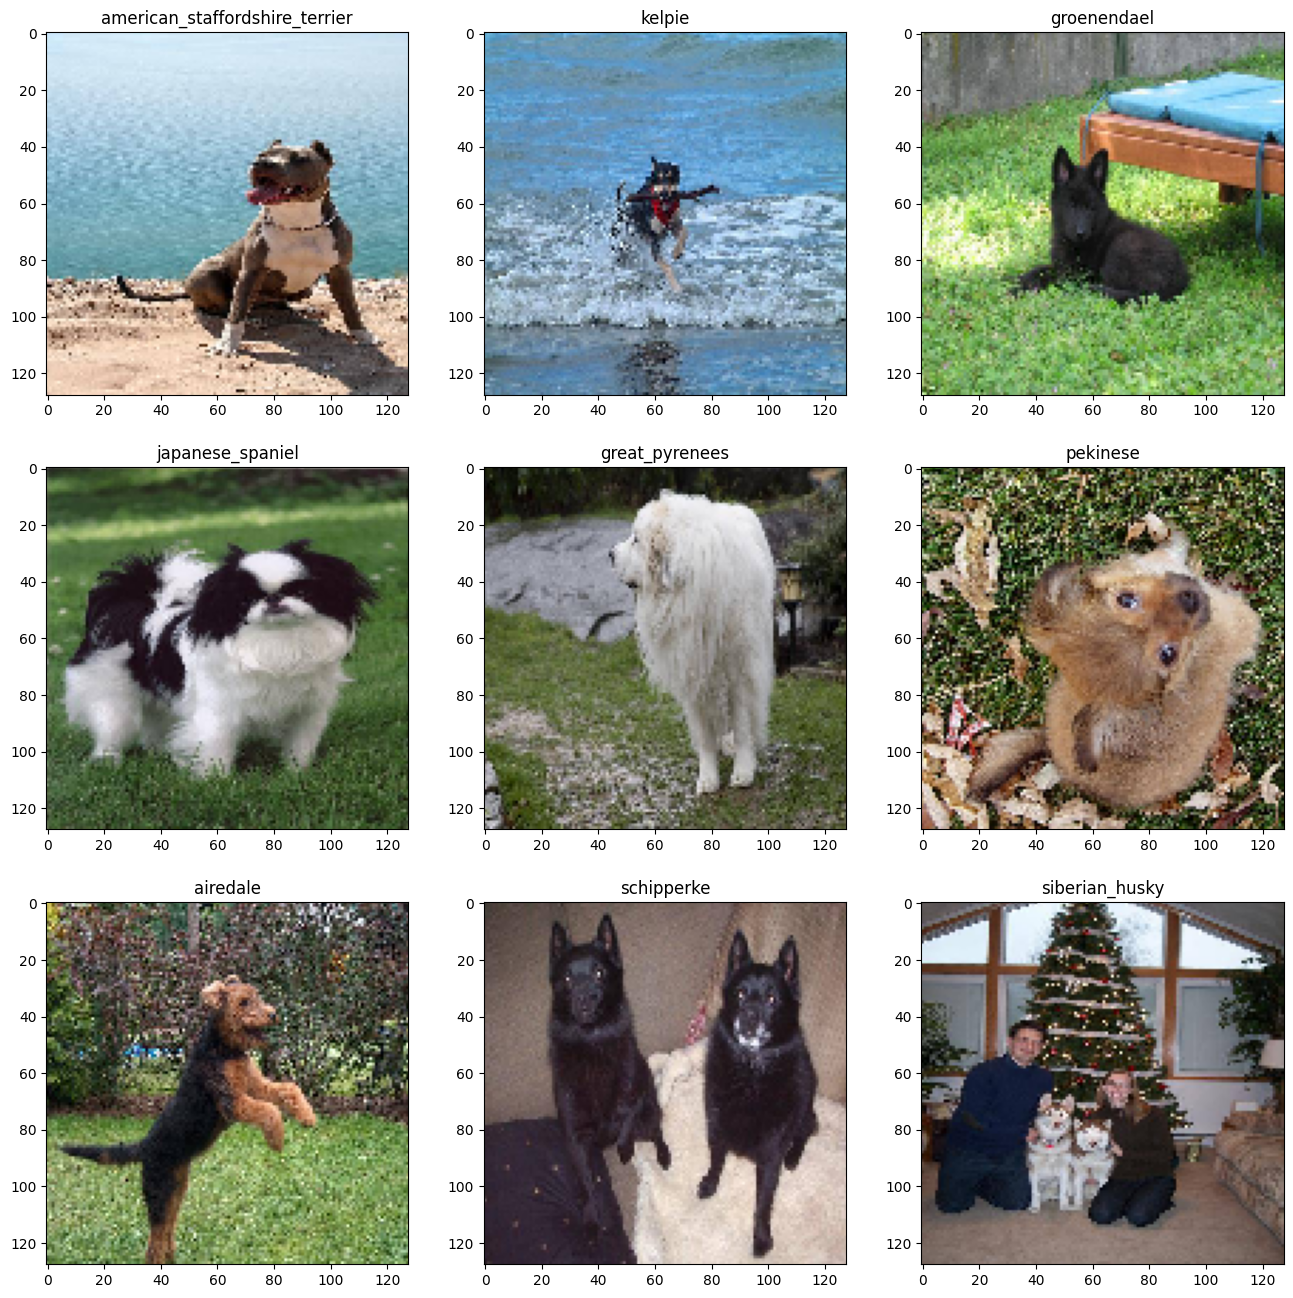

In [9]:
def show_samples(dataset_x, dataset_y):
  fig = plt.figure(figsize=(16,16))
  columns = 3
  rows = 3
  i = 1
  for ik in range(columns*rows):
    img = dataset_x[ik] 
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(img/255.0))
    index = np.argmax(dataset_y[ik])
    plt.title(labels_map_rev[index])
    i += 1
  plt.show()
show_samples(x_train, y_train)

In [10]:
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [11]:
MODEL_N = ''
MODEL = ''
MODEL_PATH = ''
HISTORY_PATH = ''
def rename_model(model):
    global MODEL_N,MODEL, MODEL_PATH, HISTORY_PATH
    MODEL_N = model
    MODEL   = os.path.join(os.getcwd(), 'model')
    MODEL_PATH   = os.path.join(os.getcwd(), 'model', MODEL_N)
    HISTORY_PATH = os.path.join(os.getcwd(), 'history')

    if (not os.path.exists(MODEL)) :
        os.mkdir(MODEL)
    if (not os.path.exists(MODEL_PATH)) :
        os.mkdir(MODEL_PATH)
    if (not os.path.exists(HISTORY_PATH)) :
        os.mkdir(HISTORY_PATH)

    file_name = 'model_' + MODEL_N
    f = open(os.path.join(HISTORY_PATH, file_name + '.csv'), "w")
    f.write("epoch, accuracy, validation_accuracy, loss, validation_loss\n")
    f.close()

In [17]:
class real_time_callback(tf.keras.callbacks.Callback):

    def __init__(self):
        super().__init__()
        self.loss_list = []
        self.val_loss = []
        self.acc_list = []
        self.val_acc = []

    def on_epoch_end(self, epoch, logs={}): 
      self.loss_list.append(logs.get('loss'))
      self.val_loss.append(logs.get('val_loss'))
      self.acc_list.append(logs.get('accuracy'))
      self.val_acc.append(logs.get('val_accuracy'))


      file_name = 'model_' + MODEL_N
      f = open(os.path.join(HISTORY_PATH, file_name + '.csv'), "a")
      f.write(str(epoch) + ', ' + str(logs.get('accuracy')) + ", " + str(logs.get('val_accuracy')) + ", " + str(logs.get('loss')) + ", " + str(logs.get('val_loss')) + '\n')
      f.close()
      if (epoch % 10) == 0:
          fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

          ax1.plot(self.loss_list)
          ax1.set_title('model loss')
          ax1.set_ylabel('loss')
          ax1.set_xlabel('epoch')
          ax1.plot(self.val_loss)
          ax1.legend(['train', 'val'], loc='upper left')

          ax2.set_title('model accuracy')
          ax2.set_ylabel('accuracy')
          ax2.set_xlabel('epoch')
          ax2.plot(self.acc_list)
          ax2.plot(self.val_acc)
          ax2.legend(['train', 'val'], loc='upper left')
          plt.show()
          file_name = 'model_' + MODEL_N + '_' + str(epoch)
          model.save(os.path.join(MODEL_PATH, file_name))
      if len(self.val_acc) >= 2 and (max(self.val_acc[:-1]) < logs.get('val_accuracy')):
        file_name = 'model_' + MODEL_N + '_BEST'
        model.save(os.path.join(MODEL_PATH, file_name))
        f = open(os.path.join(HISTORY_PATH, file_name + '.txt'), "w")
        f.write("Epoch :" + str(epoch) + "\nLoss : " + str(logs.get('loss')) + "\nAccuracy :" + str(logs.get('accuracy')) + "\nV Loss :" + str(logs.get('val_loss')) + "\nV Accuracy :" + str(logs.get('val_accuracy')))
        f.close()

In [18]:
models_data = [ ['EfficientNetB0', tf.keras.applications.EfficientNetB0, tf.keras.applications.efficientnet.preprocess_input],\
               ['ResNet50', tf.keras.applications.ResNet50, tf.keras.applications.resnet.preprocess_input],\
               ['Inceptionv3', tf.keras.applications.InceptionV3, tf.keras.applications.inception_v3.preprocess_input]]

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 global_average_pooling2d_4   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 512)               655872    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                           

2023-04-09 22:05:53.748155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


282/282 [==============================] - ETA: 0s - loss: 5.1290 - accuracy: 0.4536

2023-04-09 22:06:13.517124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


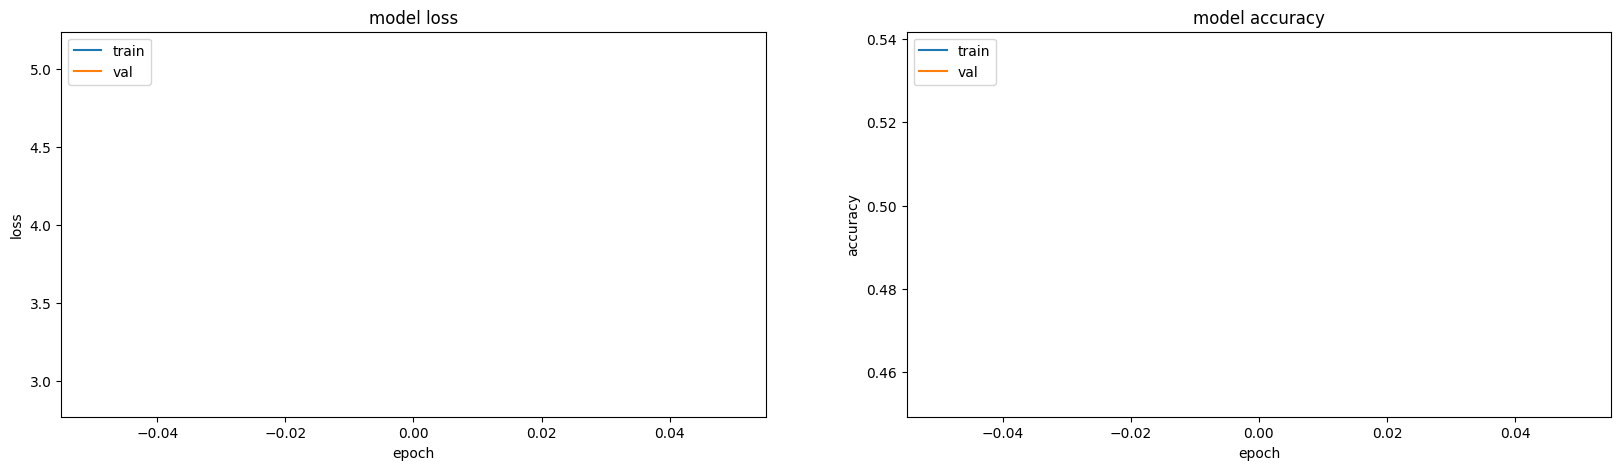

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_0/assets
282/282 [==============================] - 82s 272ms/step - loss: 5.1290 - accuracy: 0.4536 - val_loss: 2.8837 - val_accuracy: 0.5375
Epoch 2/401
282/282 [==============================] - 13s 46ms/step - loss: 2.5289 - accuracy: 0.5720 - val_loss: 2.6502 - val_accuracy: 0.5300
Epoch 3/401
282/282 [==============================] - 50s 178ms/step - loss: 2.3602 - accuracy: 0.5806 - val_loss: 2.5581 - val_accuracy: 0.5442
Epoch 4/401
282/282 [==============================] - 50s 177ms/step - loss: 2.3339 - accuracy: 0.5935 - val_loss: 2.5247 - val_accuracy: 0.5700
Epoch 5/401
282/282 [==============================] - 13s 45ms/step - loss: 2.3117 - accuracy: 0.6039 - val_loss: 2.6875 - val_accuracy: 0.5508
Epoch 6/401
282/282 [==============================] - 12s 44ms/step - loss: 2.2995 - accuracy: 0.6066 - val_loss: 2.6582 - val_accuracy: 0.5275

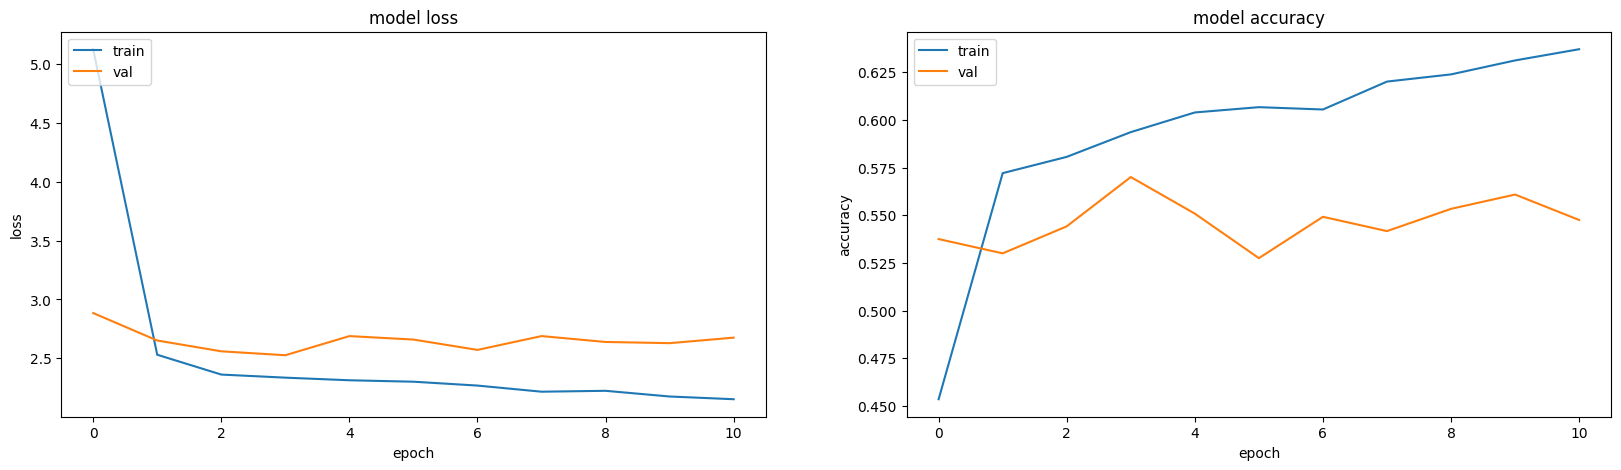

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_10/assets
282/282 [==============================] - 51s 183ms/step - loss: 2.1504 - accuracy: 0.6370 - val_loss: 2.6745 - val_accuracy: 0.5475
Epoch 12/401
282/282 [==============================] - 55s 195ms/step - loss: 2.1591 - accuracy: 0.6374 - val_loss: 2.4982 - val_accuracy: 0.5725
Epoch 13/401
282/282 [==============================] - 13s 45ms/step - loss: 2.1086 - accuracy: 0.6377 - val_loss: 2.5244 - val_accuracy: 0.5550
Epoch 14/401
282/282 [==============================] - 12s 43ms/step - loss: 2.0521 - accuracy: 0.6519 - val_loss: 2.6308 - val_accuracy: 0.5467
Epoch 15/401
282/282 [==============================] - 12s 43ms/step - loss: 2.0728 - accuracy: 0.6388 - val_loss: 2.6083 - val_accuracy: 0.5542
Epoch 16/401
282/282 [==============================] - 12s 43ms/step - loss: 2.0165 - accuracy: 0.6573 - val_loss: 2.4968 - val_accuracy: 0

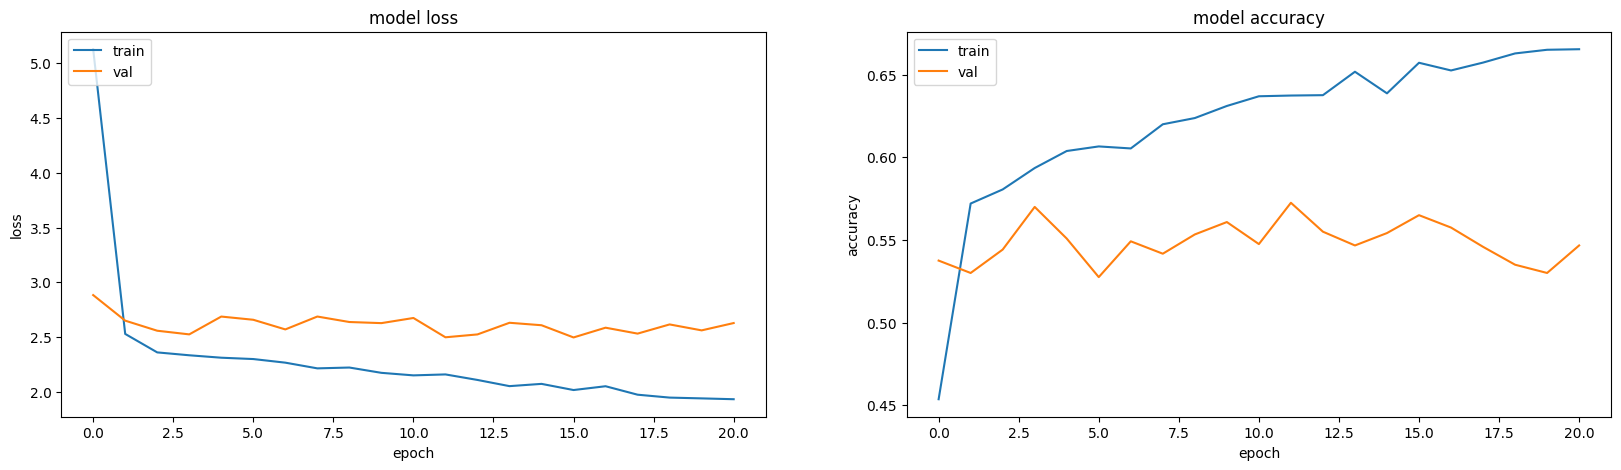

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_20/assets
282/282 [==============================] - 52s 185ms/step - loss: 1.9326 - accuracy: 0.6655 - val_loss: 2.6283 - val_accuracy: 0.5467
Epoch 22/401
282/282 [==============================] - 13s 46ms/step - loss: 1.9257 - accuracy: 0.6622 - val_loss: 2.6082 - val_accuracy: 0.5433
Epoch 23/401
282/282 [==============================] - 12s 43ms/step - loss: 1.8653 - accuracy: 0.6859 - val_loss: 2.5932 - val_accuracy: 0.5625
Epoch 24/401
282/282 [==============================] - 12s 44ms/step - loss: 1.8721 - accuracy: 0.6781 - val_loss: 2.6093 - val_accuracy: 0.5550
Epoch 25/401
282/282 [==============================] - 12s 44ms/step - loss: 1.8842 - accuracy: 0.6758 - val_loss: 2.5819 - val_accuracy: 0.5583
Epoch 26/401
282/282 [==============================] - 13s 44ms/step - loss: 1.8690 - accuracy: 0.6785 - val_loss: 2.5973 - val_accuracy: 0.

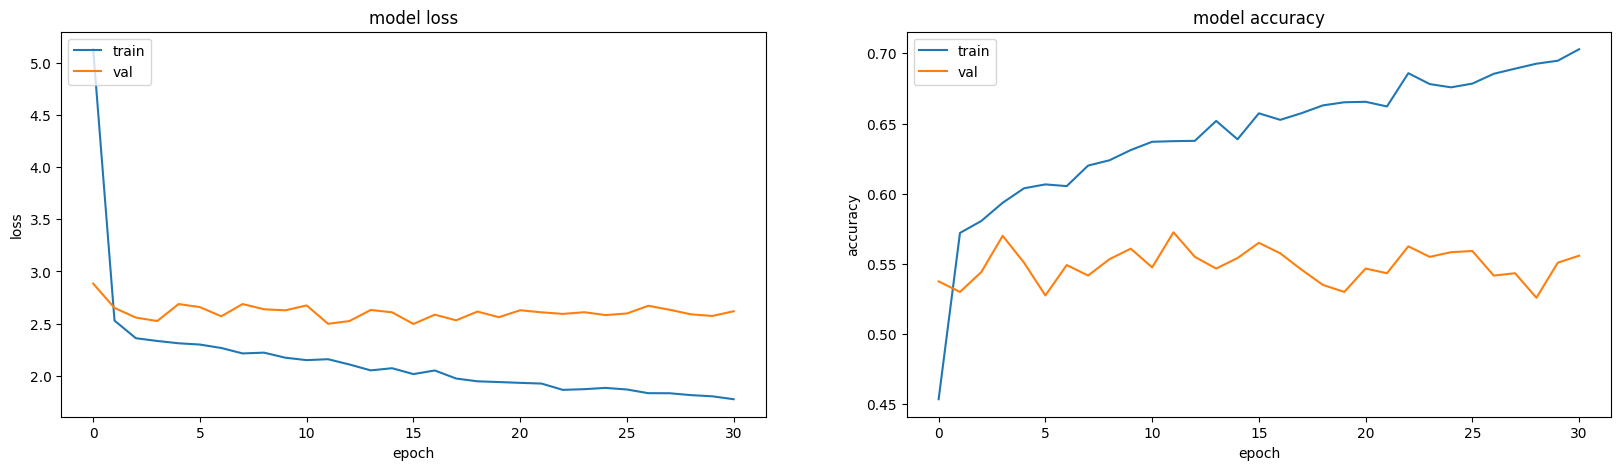

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_30/assets
282/282 [==============================] - 56s 198ms/step - loss: 1.7757 - accuracy: 0.7029 - val_loss: 2.6186 - val_accuracy: 0.5558
Epoch 32/401
282/282 [==============================] - 13s 45ms/step - loss: 1.7799 - accuracy: 0.6961 - val_loss: 2.5768 - val_accuracy: 0.5558
Epoch 33/401
282/282 [==============================] - 12s 43ms/step - loss: 1.7325 - accuracy: 0.7067 - val_loss: 2.6629 - val_accuracy: 0.5408
Epoch 34/401
282/282 [==============================] - 12s 43ms/step - loss: 1.7429 - accuracy: 0.7047 - val_loss: 2.5476 - val_accuracy: 0.5492
Epoch 35/401
282/282 [==============================] - 12s 43ms/step - loss: 1.7553 - accuracy: 0.7078 - val_loss: 2.6865 - val_accuracy: 0.5483
Epoch 36/401
282/282 [==============================] - 12s 44ms/step - loss: 1.7771 - accuracy: 0.7043 - val_loss: 2.6437 - val_accuracy: 0.

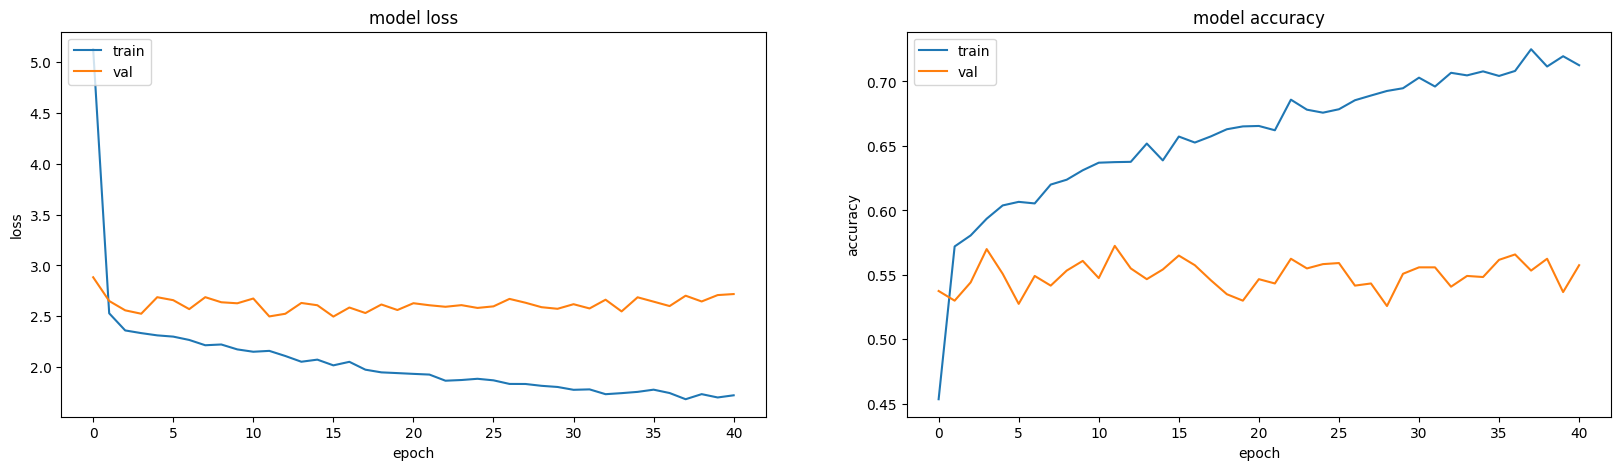

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_40/assets
282/282 [==============================] - 54s 193ms/step - loss: 1.7217 - accuracy: 0.7126 - val_loss: 2.7185 - val_accuracy: 0.5575
Epoch 42/401
282/282 [==============================] - 13s 45ms/step - loss: 1.7293 - accuracy: 0.7147 - val_loss: 2.7176 - val_accuracy: 0.5442
Epoch 43/401
282/282 [==============================] - 12s 43ms/step - loss: 1.7336 - accuracy: 0.7154 - val_loss: 2.7520 - val_accuracy: 0.5433
Epoch 44/401
282/282 [==============================] - 12s 43ms/step - loss: 1.7199 - accuracy: 0.7186 - val_loss: 2.5902 - val_accuracy: 0.5517
Epoch 45/401
282/282 [==============================] - 12s 43ms/step - loss: 1.6929 - accuracy: 0.7175 - val_loss: 2.6650 - val_accuracy: 0.5450
Epoch 46/401
282/282 [==============================] - 12s 44ms/step - loss: 1.6492 - accuracy: 0.7299 - val_loss: 2.6015 - val_accuracy: 0.

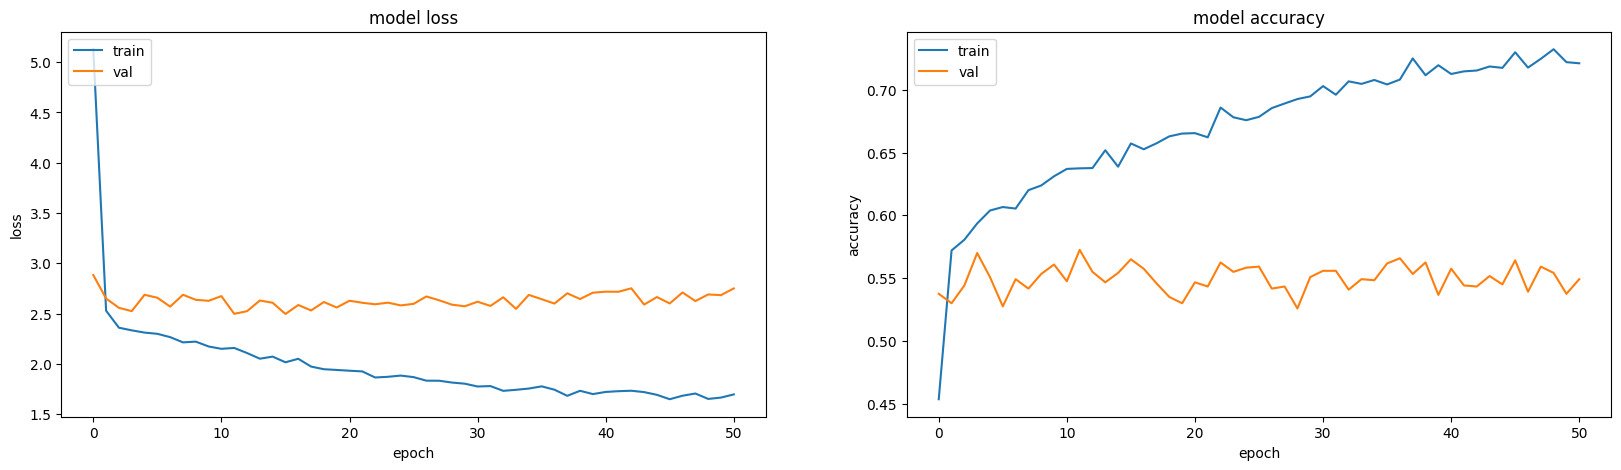

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_50/assets
282/282 [==============================] - 56s 200ms/step - loss: 1.6971 - accuracy: 0.7211 - val_loss: 2.7506 - val_accuracy: 0.5492
Epoch 52/401
282/282 [==============================] - 13s 45ms/step - loss: 1.6438 - accuracy: 0.7364 - val_loss: 2.7225 - val_accuracy: 0.5375
Epoch 53/401
282/282 [==============================] - 12s 43ms/step - loss: 1.6622 - accuracy: 0.7327 - val_loss: 2.7493 - val_accuracy: 0.5425
Epoch 54/401
282/282 [==============================] - 12s 44ms/step - loss: 1.6652 - accuracy: 0.7314 - val_loss: 2.7264 - val_accuracy: 0.5417
Epoch 55/401
282/282 [==============================] - 12s 43ms/step - loss: 1.6534 - accuracy: 0.7304 - val_loss: 2.7585 - val_accuracy: 0.5375
Epoch 56/401
282/282 [==============================] - 12s 43ms/step - loss: 1.6016 - accuracy: 0.7435 - val_loss: 2.5862 - val_accuracy: 0.

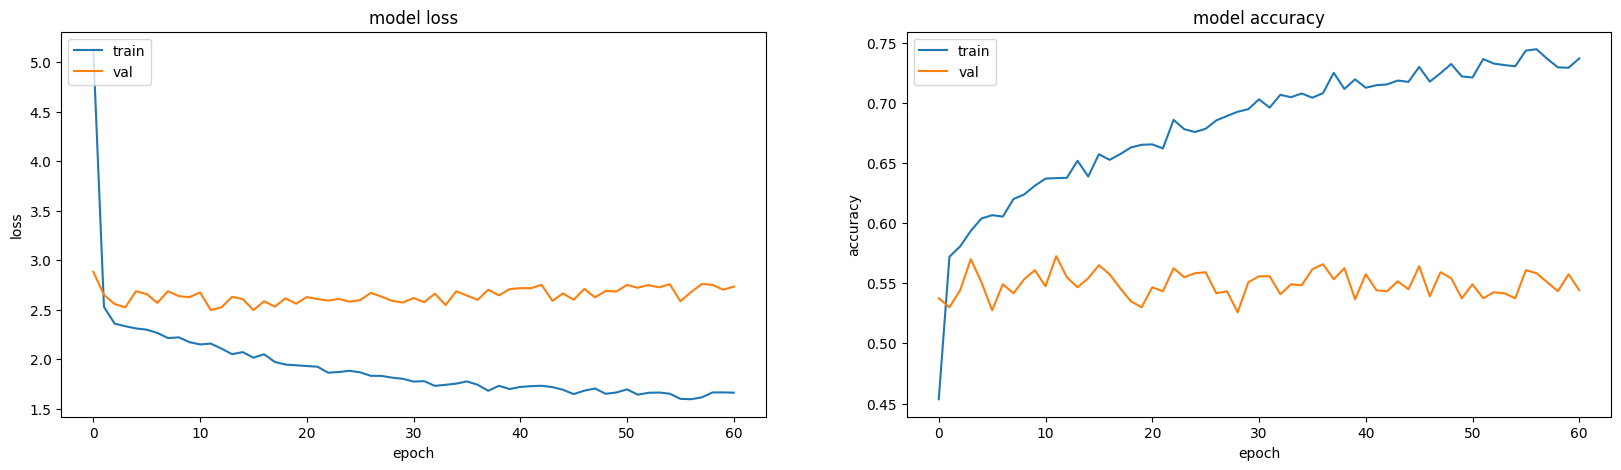

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_60/assets
282/282 [==============================] - 36s 127ms/step - loss: 1.6637 - accuracy: 0.7370 - val_loss: 2.7340 - val_accuracy: 0.5442
Epoch 62/401
282/282 [==============================] - 13s 45ms/step - loss: 1.5942 - accuracy: 0.7467 - val_loss: 2.6803 - val_accuracy: 0.5458
Epoch 63/401
282/282 [==============================] - 12s 44ms/step - loss: 1.6389 - accuracy: 0.7337 - val_loss: 2.7632 - val_accuracy: 0.5483
Epoch 64/401
282/282 [==============================] - 12s 44ms/step - loss: 1.6321 - accuracy: 0.7392 - val_loss: 2.7010 - val_accuracy: 0.5617
Epoch 65/401
282/282 [==============================] - 12s 44ms/step - loss: 1.6222 - accuracy: 0.7440 - val_loss: 2.6632 - val_accuracy: 0.5683
Epoch 66/401
282/282 [==============================] - 12s 44ms/step - loss: 1.6356 - accuracy: 0.7378 - val_loss: 2.6981 - val_accuracy: 0.

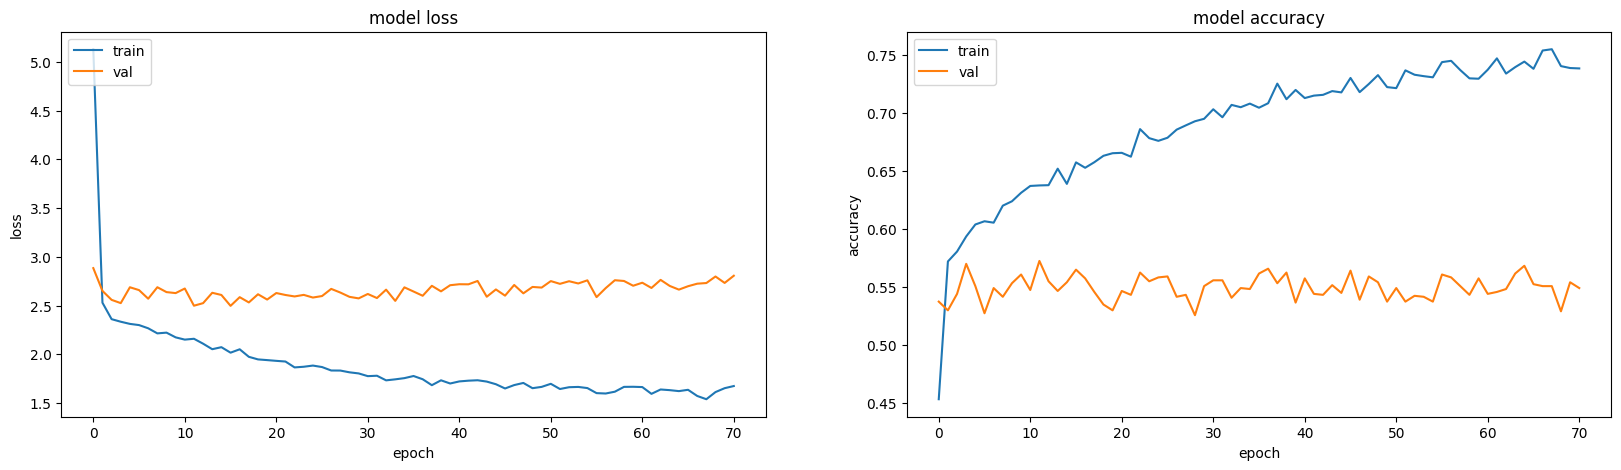

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_70/assets
282/282 [==============================] - 58s 205ms/step - loss: 1.6743 - accuracy: 0.7381 - val_loss: 2.8057 - val_accuracy: 0.5492
Epoch 72/401
282/282 [==============================] - 13s 45ms/step - loss: 1.6430 - accuracy: 0.7430 - val_loss: 2.7743 - val_accuracy: 0.5400
Epoch 73/401
282/282 [==============================] - 12s 44ms/step - loss: 1.5991 - accuracy: 0.7447 - val_loss: 2.7535 - val_accuracy: 0.5458
Epoch 74/401
282/282 [==============================] - 12s 43ms/step - loss: 1.5703 - accuracy: 0.7494 - val_loss: 2.6623 - val_accuracy: 0.5542
Epoch 75/401
282/282 [==============================] - 13s 45ms/step - loss: 1.5563 - accuracy: 0.7517 - val_loss: 2.6811 - val_accuracy: 0.5475
Epoch 76/401
282/282 [==============================] - 13s 45ms/step - loss: 1.6088 - accuracy: 0.7416 - val_loss: 2.6930 - val_accuracy: 0.

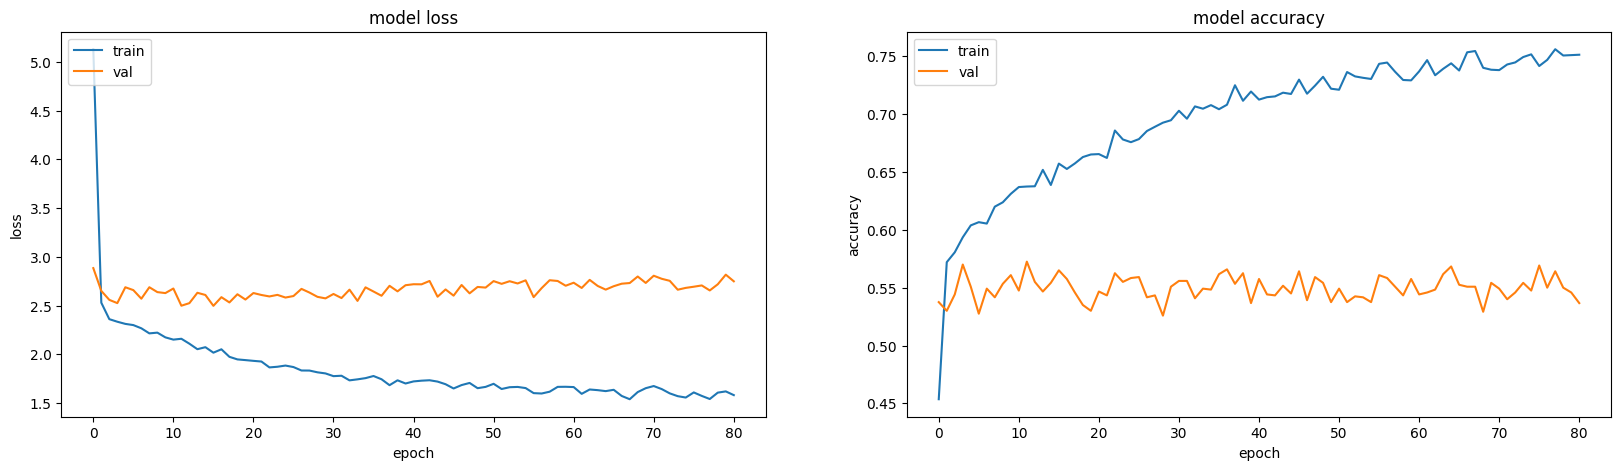

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_80/assets
282/282 [==============================] - 55s 195ms/step - loss: 1.5810 - accuracy: 0.7514 - val_loss: 2.7484 - val_accuracy: 0.5367
Epoch 82/401
282/282 [==============================] - 13s 46ms/step - loss: 1.5924 - accuracy: 0.7496 - val_loss: 2.7646 - val_accuracy: 0.5542
Epoch 83/401
282/282 [==============================] - 12s 44ms/step - loss: 1.5697 - accuracy: 0.7516 - val_loss: 2.7118 - val_accuracy: 0.5567
Epoch 84/401
282/282 [==============================] - 12s 44ms/step - loss: 1.5083 - accuracy: 0.7636 - val_loss: 2.7723 - val_accuracy: 0.5450
Epoch 85/401
282/282 [==============================] - 12s 44ms/step - loss: 1.5802 - accuracy: 0.7495 - val_loss: 2.8675 - val_accuracy: 0.5367
Epoch 86/401
282/282 [==============================] - 60s 214ms/step - loss: 1.5655 - accuracy: 0.7525 - val_loss: 2.7131 - val_accuracy: 0

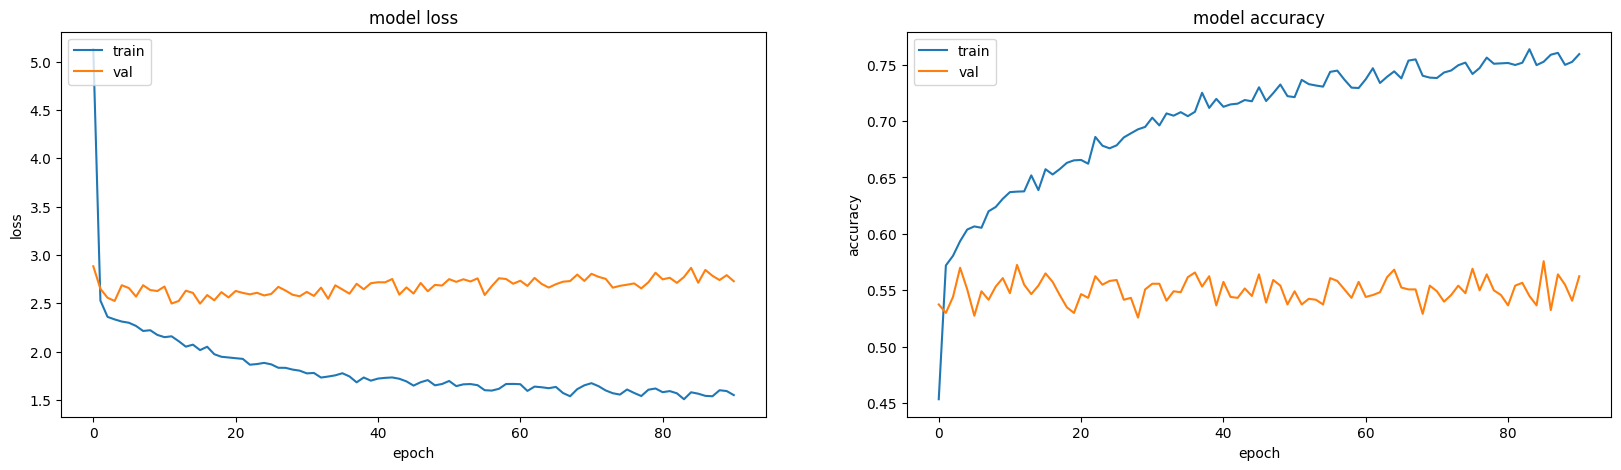

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_90/assets
282/282 [==============================] - 60s 212ms/step - loss: 1.5508 - accuracy: 0.7593 - val_loss: 2.7286 - val_accuracy: 0.5625
Epoch 92/401
282/282 [==============================] - 13s 47ms/step - loss: 1.5479 - accuracy: 0.7523 - val_loss: 2.6731 - val_accuracy: 0.5592
Epoch 93/401
282/282 [==============================] - 12s 44ms/step - loss: 1.5515 - accuracy: 0.7601 - val_loss: 2.8695 - val_accuracy: 0.5458
Epoch 94/401
282/282 [==============================] - 12s 44ms/step - loss: 1.5896 - accuracy: 0.7515 - val_loss: 2.6595 - val_accuracy: 0.5600
Epoch 95/401
282/282 [==============================] - 12s 44ms/step - loss: 1.5018 - accuracy: 0.7675 - val_loss: 2.6972 - val_accuracy: 0.5558
Epoch 96/401
282/282 [==============================] - 12s 44ms/step - loss: 1.5555 - accuracy: 0.7581 - val_loss: 2.7764 - val_accuracy: 0.

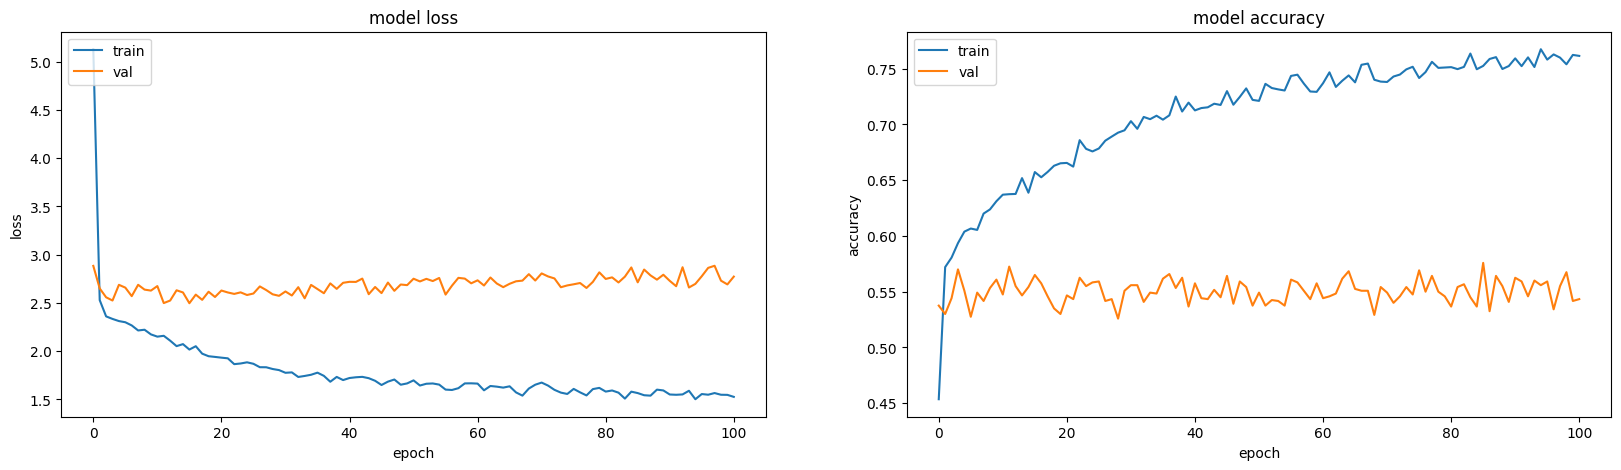

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_100/assets
282/282 [==============================] - 59s 209ms/step - loss: 1.5261 - accuracy: 0.7615 - val_loss: 2.7725 - val_accuracy: 0.5433
Epoch 102/401
282/282 [==============================] - 13s 45ms/step - loss: 1.5484 - accuracy: 0.7569 - val_loss: 2.7438 - val_accuracy: 0.5508
Epoch 103/401
282/282 [==============================] - 12s 44ms/step - loss: 1.5663 - accuracy: 0.7522 - val_loss: 2.7697 - val_accuracy: 0.5358
Epoch 104/401
282/282 [==============================] - 12s 43ms/step - loss: 1.5386 - accuracy: 0.7596 - val_loss: 2.7519 - val_accuracy: 0.5342
Epoch 105/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4910 - accuracy: 0.7692 - val_loss: 2.6928 - val_accuracy: 0.5475
Epoch 106/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4992 - accuracy: 0.7654 - val_loss: 2.6777 - val_accura

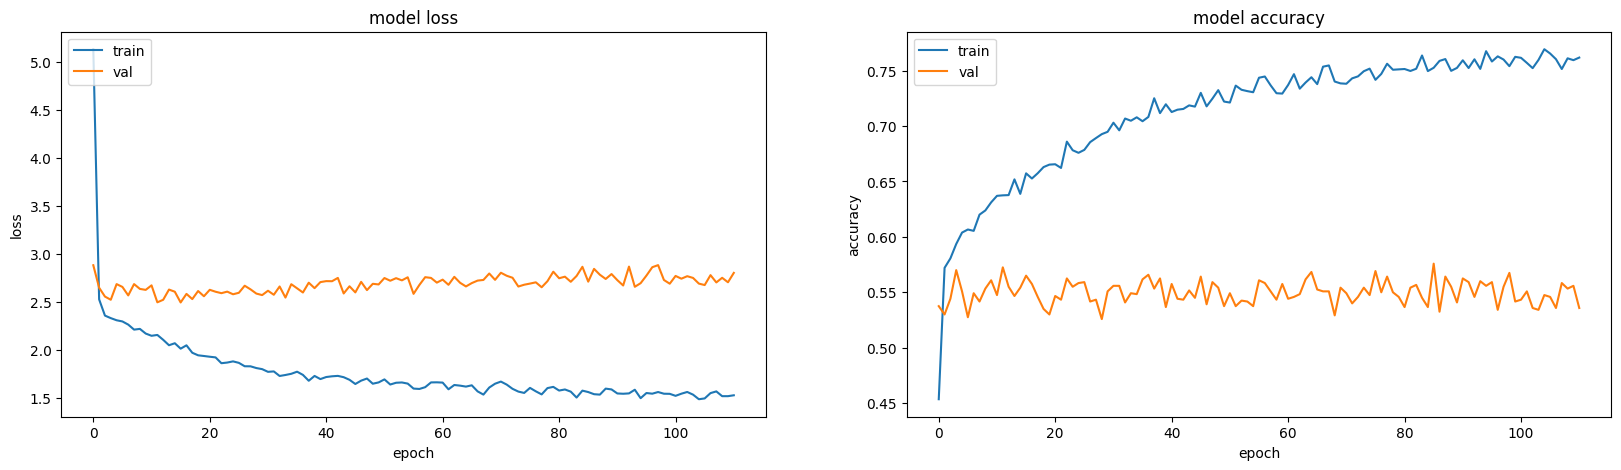

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_110/assets
282/282 [==============================] - 60s 213ms/step - loss: 1.5320 - accuracy: 0.7617 - val_loss: 2.8042 - val_accuracy: 0.5358
Epoch 112/401
282/282 [==============================] - 13s 45ms/step - loss: 1.5486 - accuracy: 0.7585 - val_loss: 2.8204 - val_accuracy: 0.5483
Epoch 113/401
282/282 [==============================] - 12s 43ms/step - loss: 1.5291 - accuracy: 0.7585 - val_loss: 2.7883 - val_accuracy: 0.5475
Epoch 114/401
282/282 [==============================] - 12s 43ms/step - loss: 1.5373 - accuracy: 0.7596 - val_loss: 2.6909 - val_accuracy: 0.5658
Epoch 115/401
282/282 [==============================] - 12s 44ms/step - loss: 1.5024 - accuracy: 0.7671 - val_loss: 2.6747 - val_accuracy: 0.5500
Epoch 116/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4871 - accuracy: 0.7706 - val_loss: 2.6444 - val_accura

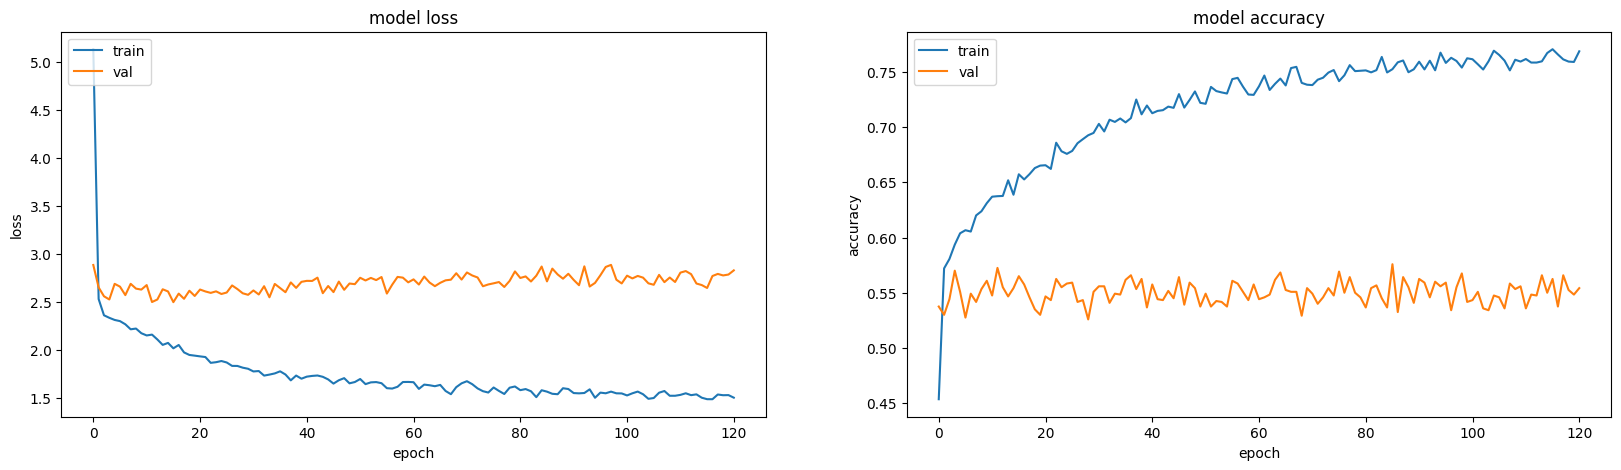

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_120/assets
282/282 [==============================] - 36s 127ms/step - loss: 1.5028 - accuracy: 0.7687 - val_loss: 2.8276 - val_accuracy: 0.5542
Epoch 122/401
282/282 [==============================] - 13s 45ms/step - loss: 1.5040 - accuracy: 0.7639 - val_loss: 2.7699 - val_accuracy: 0.5500
Epoch 123/401
282/282 [==============================] - 12s 44ms/step - loss: 1.5188 - accuracy: 0.7594 - val_loss: 2.7150 - val_accuracy: 0.5508
Epoch 124/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4943 - accuracy: 0.7721 - val_loss: 2.7408 - val_accuracy: 0.5650
Epoch 125/401
282/282 [==============================] - 12s 43ms/step - loss: 1.5187 - accuracy: 0.7581 - val_loss: 2.7233 - val_accuracy: 0.5550
Epoch 126/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4513 - accuracy: 0.7781 - val_loss: 2.7521 - val_accura

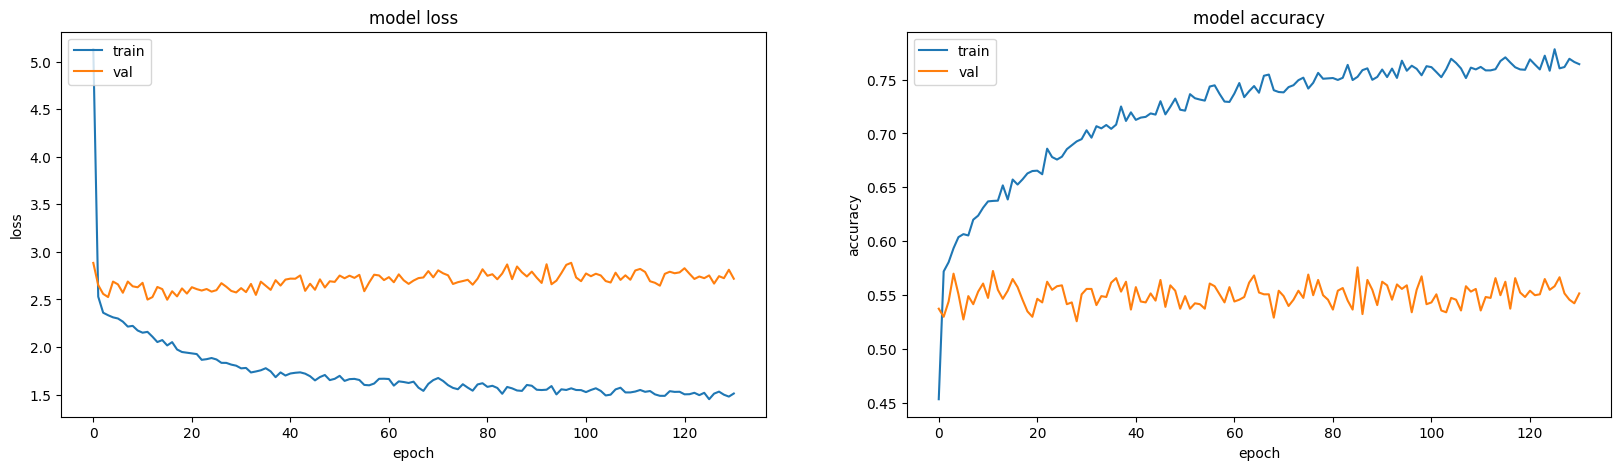

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_130/assets
282/282 [==============================] - 57s 204ms/step - loss: 1.5114 - accuracy: 0.7642 - val_loss: 2.7175 - val_accuracy: 0.5517
Epoch 132/401
282/282 [==============================] - 13s 45ms/step - loss: 1.5244 - accuracy: 0.7571 - val_loss: 2.7269 - val_accuracy: 0.5600
Epoch 133/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4840 - accuracy: 0.7730 - val_loss: 2.6486 - val_accuracy: 0.5608
Epoch 134/401
282/282 [==============================] - 54s 190ms/step - loss: 1.4995 - accuracy: 0.7701 - val_loss: 2.6854 - val_accuracy: 0.5900
Epoch 135/401
282/282 [==============================] - 13s 45ms/step - loss: 1.4789 - accuracy: 0.7740 - val_loss: 2.7894 - val_accuracy: 0.5367
Epoch 136/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4794 - accuracy: 0.7670 - val_loss: 2.7318 - val_accur

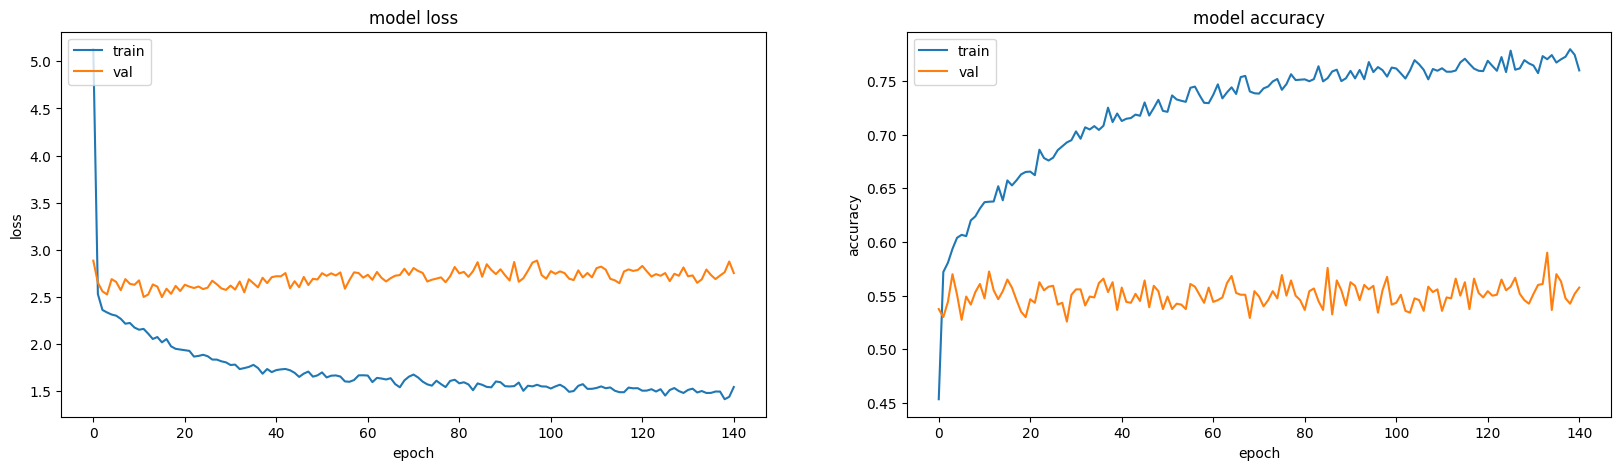

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_140/assets
282/282 [==============================] - 55s 195ms/step - loss: 1.5420 - accuracy: 0.7597 - val_loss: 2.7521 - val_accuracy: 0.5575
Epoch 142/401
282/282 [==============================] - 13s 45ms/step - loss: 1.5135 - accuracy: 0.7677 - val_loss: 2.7434 - val_accuracy: 0.5558
Epoch 143/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4993 - accuracy: 0.7678 - val_loss: 2.7834 - val_accuracy: 0.5350
Epoch 144/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4823 - accuracy: 0.7713 - val_loss: 2.6973 - val_accuracy: 0.5450
Epoch 145/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4814 - accuracy: 0.7717 - val_loss: 2.6966 - val_accuracy: 0.5550
Epoch 146/401
282/282 [==============================] - 12s 43ms/step - loss: 1.5135 - accuracy: 0.7646 - val_loss: 2.7128 - val_accura

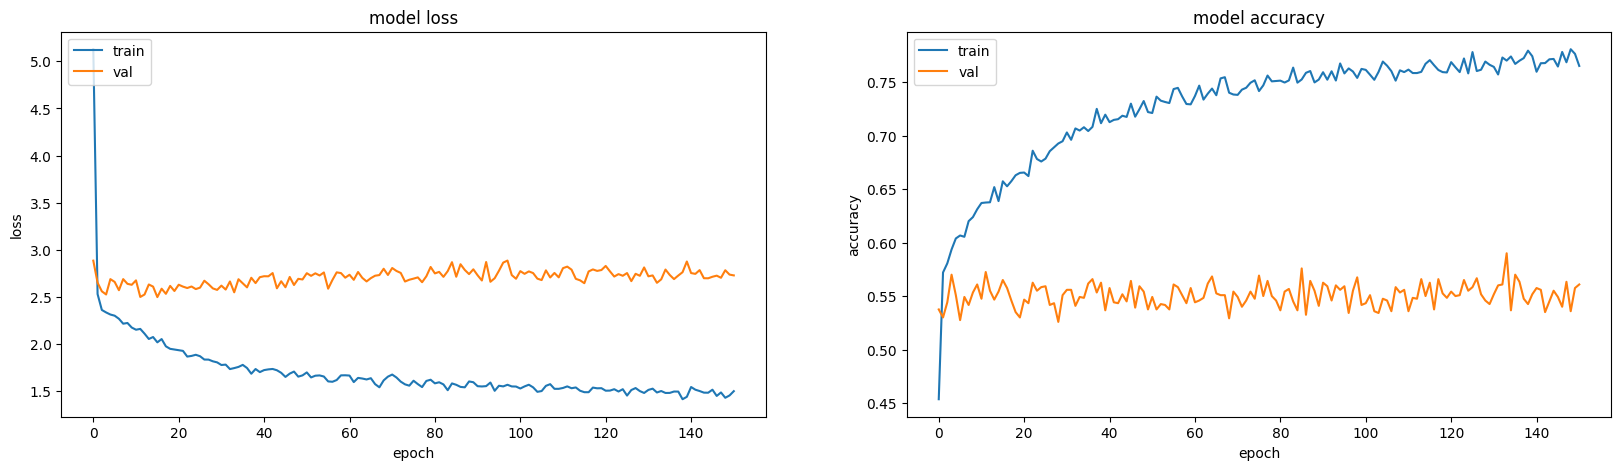

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_150/assets
282/282 [==============================] - 58s 207ms/step - loss: 1.4980 - accuracy: 0.7651 - val_loss: 2.7272 - val_accuracy: 0.5608
Epoch 152/401
282/282 [==============================] - 13s 46ms/step - loss: 1.4938 - accuracy: 0.7737 - val_loss: 2.7791 - val_accuracy: 0.5383
Epoch 153/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4981 - accuracy: 0.7736 - val_loss: 2.7706 - val_accuracy: 0.5583
Epoch 154/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4692 - accuracy: 0.7688 - val_loss: 2.7100 - val_accuracy: 0.5550
Epoch 155/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4490 - accuracy: 0.7774 - val_loss: 2.7304 - val_accuracy: 0.5383
Epoch 156/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4486 - accuracy: 0.7815 - val_loss: 2.7578 - val_accura

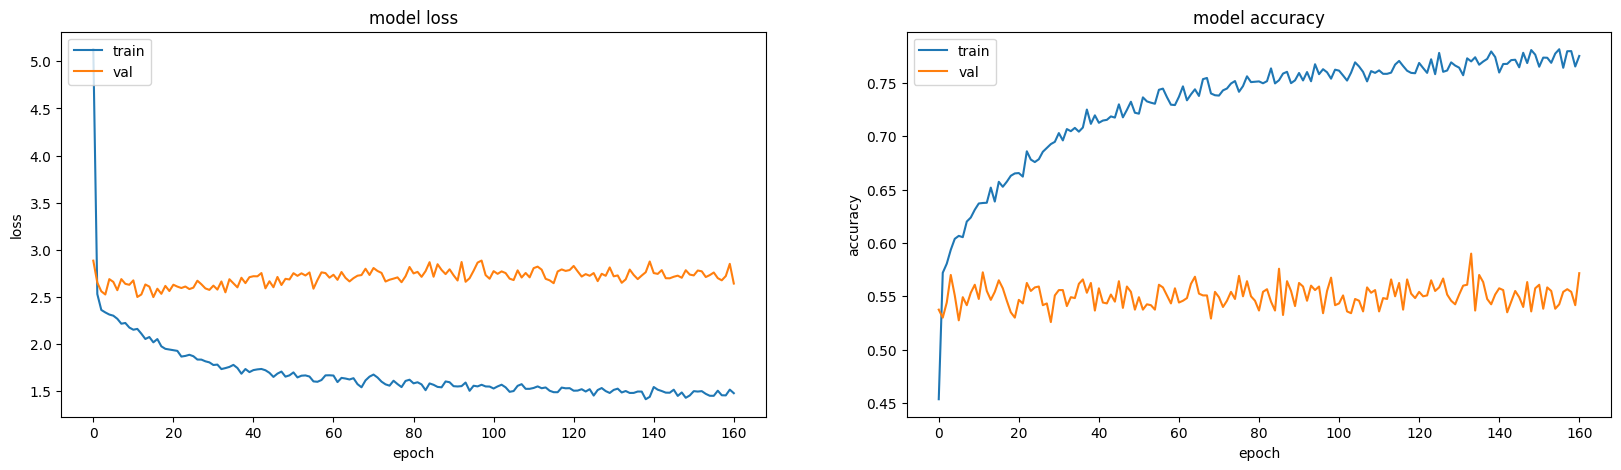

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_160/assets
282/282 [==============================] - 61s 216ms/step - loss: 1.4764 - accuracy: 0.7752 - val_loss: 2.6407 - val_accuracy: 0.5717
Epoch 162/401
282/282 [==============================] - 13s 46ms/step - loss: 1.4286 - accuracy: 0.7791 - val_loss: 2.7627 - val_accuracy: 0.5592
Epoch 163/401
282/282 [==============================] - 13s 45ms/step - loss: 1.4664 - accuracy: 0.7692 - val_loss: 2.7075 - val_accuracy: 0.5608
Epoch 164/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4348 - accuracy: 0.7783 - val_loss: 2.6831 - val_accuracy: 0.5442
Epoch 165/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4554 - accuracy: 0.7719 - val_loss: 2.8003 - val_accuracy: 0.5392
Epoch 166/401
282/282 [==============================] - 12s 44ms/step - loss: 1.5287 - accuracy: 0.7651 - val_loss: 2.7655 - val_accura

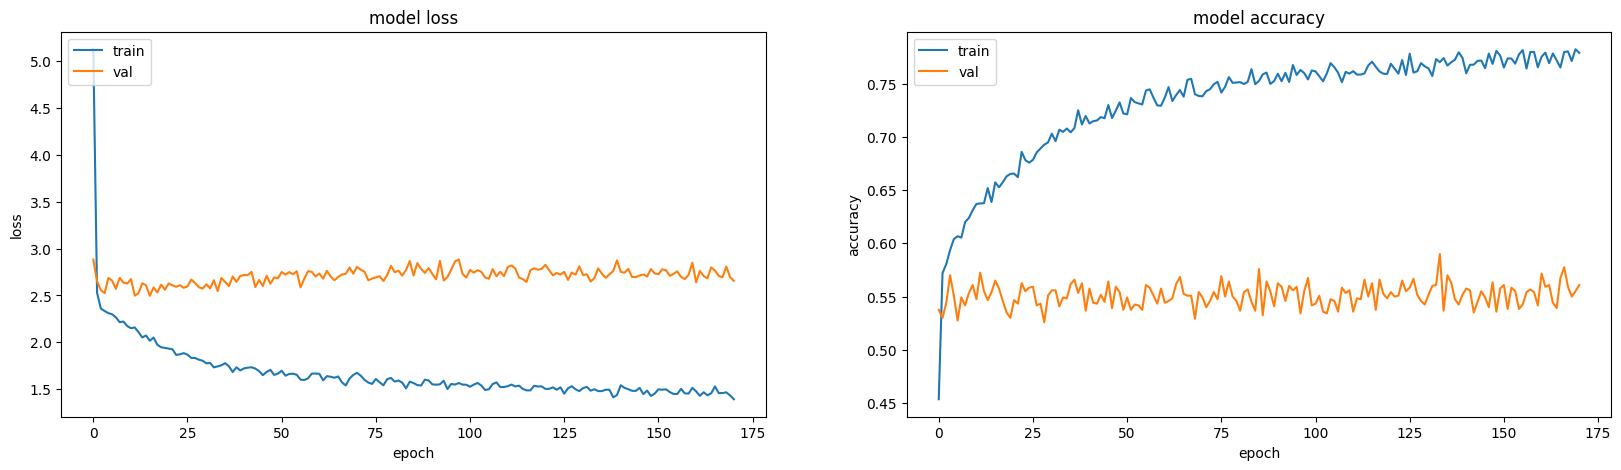

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_170/assets
282/282 [==============================] - 36s 126ms/step - loss: 1.3925 - accuracy: 0.7789 - val_loss: 2.6564 - val_accuracy: 0.5608
Epoch 172/401
282/282 [==============================] - 13s 45ms/step - loss: 1.4086 - accuracy: 0.7812 - val_loss: 2.8514 - val_accuracy: 0.5175
Epoch 173/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4611 - accuracy: 0.7733 - val_loss: 2.7139 - val_accuracy: 0.5667
Epoch 174/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4566 - accuracy: 0.7740 - val_loss: 2.8364 - val_accuracy: 0.5417
Epoch 175/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4867 - accuracy: 0.7724 - val_loss: 2.7508 - val_accuracy: 0.5583
Epoch 176/401
282/282 [==============================] - 12s 43ms/step - loss: 1.5057 - accuracy: 0.7729 - val_loss: 2.8506 - val_accura

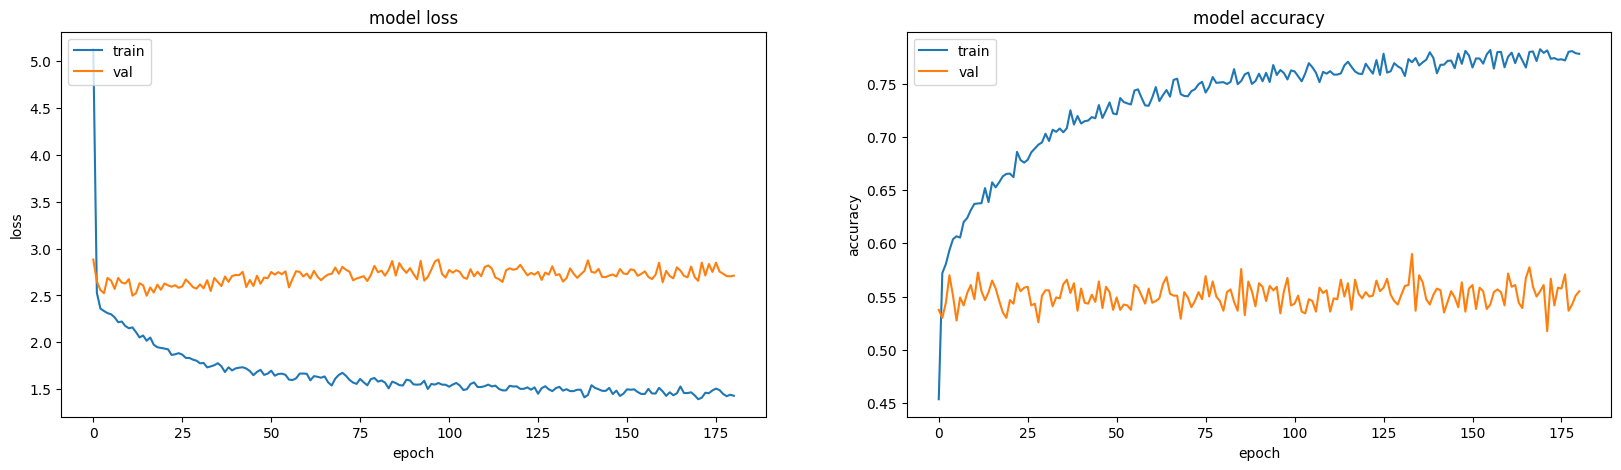

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_180/assets
282/282 [==============================] - 59s 209ms/step - loss: 1.4292 - accuracy: 0.7780 - val_loss: 2.7119 - val_accuracy: 0.5550
Epoch 182/401
282/282 [==============================] - 13s 44ms/step - loss: 1.4626 - accuracy: 0.7716 - val_loss: 2.7100 - val_accuracy: 0.5575
Epoch 183/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4637 - accuracy: 0.7749 - val_loss: 2.7378 - val_accuracy: 0.5658
Epoch 184/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4448 - accuracy: 0.7729 - val_loss: 2.6785 - val_accuracy: 0.5600
Epoch 185/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3589 - accuracy: 0.7935 - val_loss: 2.6971 - val_accuracy: 0.5583
Epoch 186/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4754 - accuracy: 0.7742 - val_loss: 2.8241 - val_accura

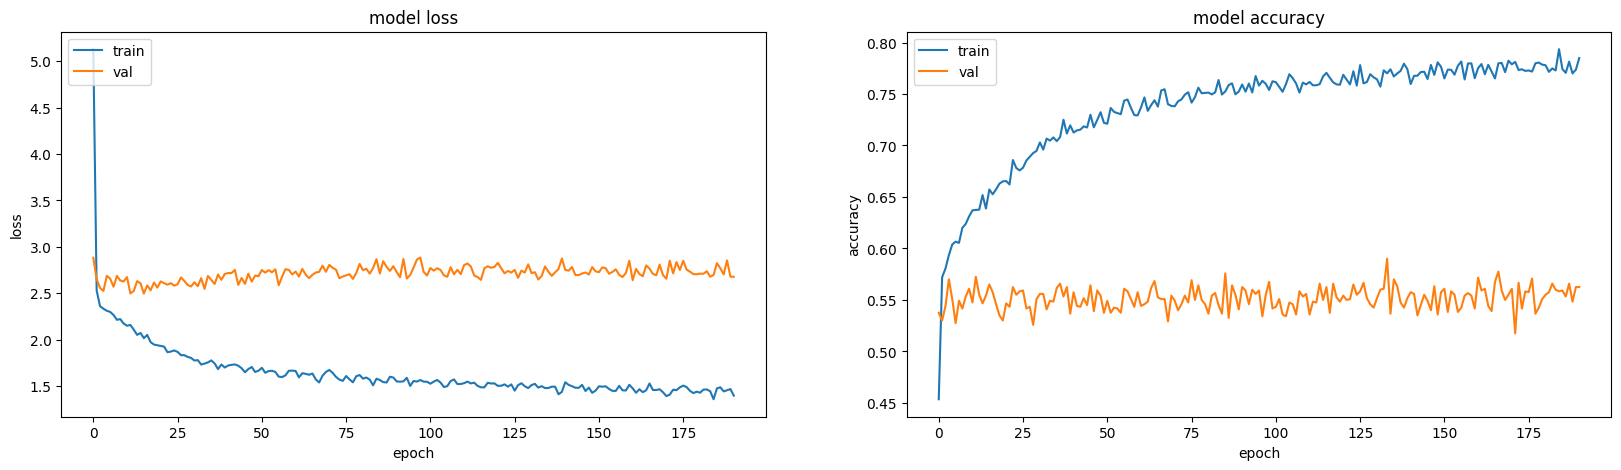

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_190/assets
282/282 [==============================] - 62s 220ms/step - loss: 1.3977 - accuracy: 0.7850 - val_loss: 2.6780 - val_accuracy: 0.5625
Epoch 192/401
282/282 [==============================] - 13s 46ms/step - loss: 1.3929 - accuracy: 0.7824 - val_loss: 2.6778 - val_accuracy: 0.5592
Epoch 193/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4764 - accuracy: 0.7677 - val_loss: 2.8384 - val_accuracy: 0.5583
Epoch 194/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4578 - accuracy: 0.7758 - val_loss: 2.7183 - val_accuracy: 0.5517
Epoch 195/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4302 - accuracy: 0.7813 - val_loss: 2.7551 - val_accuracy: 0.5675
Epoch 196/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4198 - accuracy: 0.7831 - val_loss: 2.6715 - val_accura

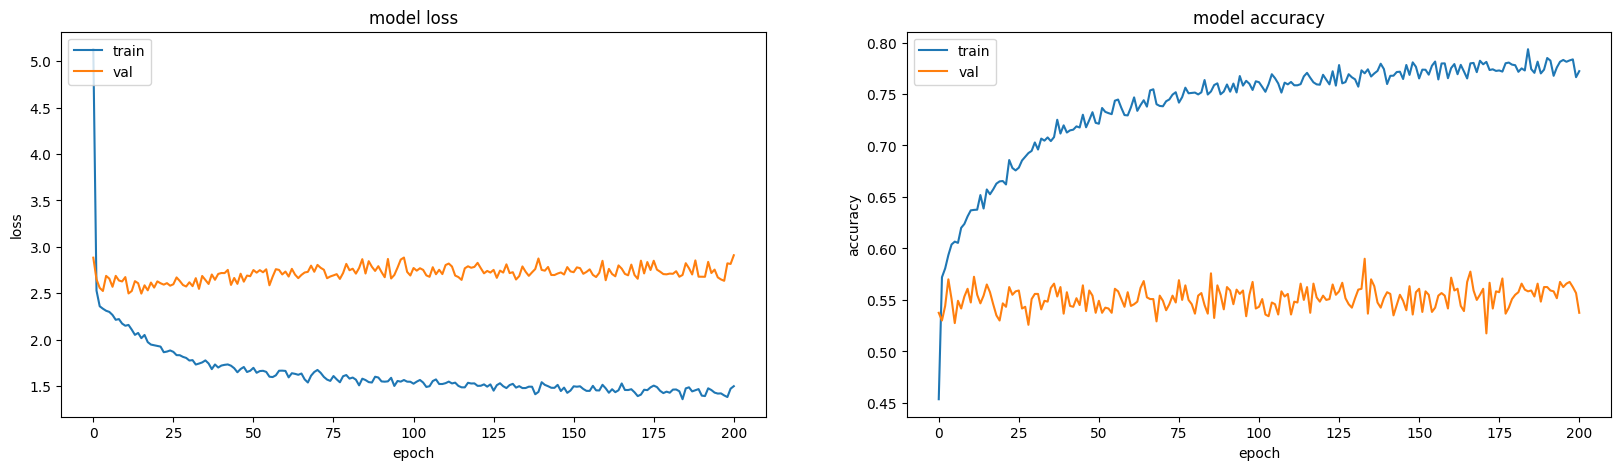

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_200/assets
282/282 [==============================] - 59s 211ms/step - loss: 1.4993 - accuracy: 0.7722 - val_loss: 2.9097 - val_accuracy: 0.5375
Epoch 202/401
282/282 [==============================] - 13s 44ms/step - loss: 1.4889 - accuracy: 0.7729 - val_loss: 2.7853 - val_accuracy: 0.5517
Epoch 203/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4669 - accuracy: 0.7716 - val_loss: 2.7700 - val_accuracy: 0.5642
Epoch 204/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3899 - accuracy: 0.7898 - val_loss: 2.7470 - val_accuracy: 0.5533
Epoch 205/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3872 - accuracy: 0.7865 - val_loss: 2.7059 - val_accuracy: 0.5717
Epoch 206/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3569 - accuracy: 0.7941 - val_loss: 2.6631 - val_accura

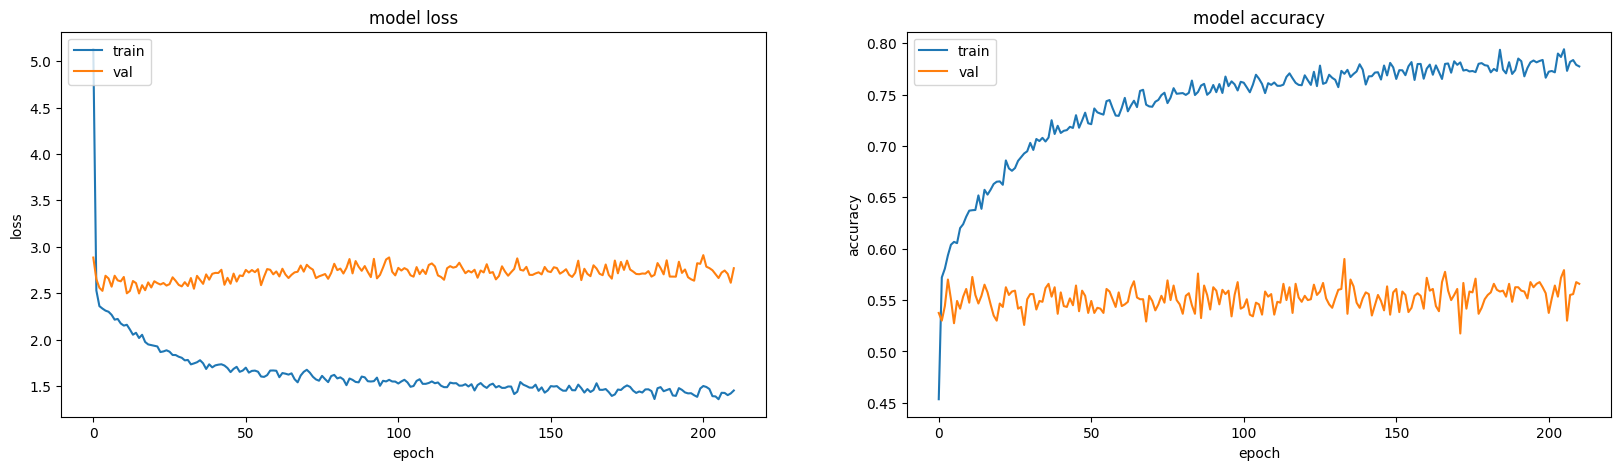

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_210/assets
282/282 [==============================] - 61s 218ms/step - loss: 1.4509 - accuracy: 0.7773 - val_loss: 2.7687 - val_accuracy: 0.5658
Epoch 212/401
282/282 [==============================] - 13s 45ms/step - loss: 1.4739 - accuracy: 0.7723 - val_loss: 2.7920 - val_accuracy: 0.5542
Epoch 213/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4244 - accuracy: 0.7855 - val_loss: 2.8649 - val_accuracy: 0.5483
Epoch 214/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4610 - accuracy: 0.7779 - val_loss: 2.7150 - val_accuracy: 0.5633
Epoch 215/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4096 - accuracy: 0.7836 - val_loss: 2.6761 - val_accuracy: 0.5633
Epoch 216/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3944 - accuracy: 0.7871 - val_loss: 2.6569 - val_accura

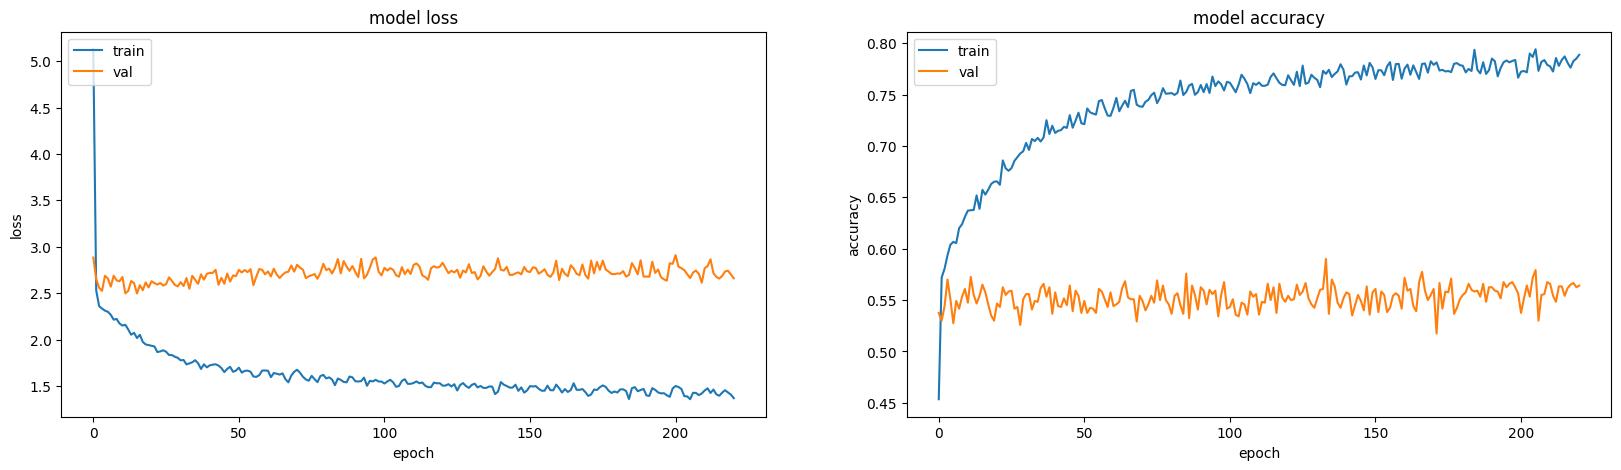

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_220/assets
282/282 [==============================] - 35s 126ms/step - loss: 1.3683 - accuracy: 0.7886 - val_loss: 2.6604 - val_accuracy: 0.5642
Epoch 222/401
282/282 [==============================] - 13s 46ms/step - loss: 1.4167 - accuracy: 0.7812 - val_loss: 2.7006 - val_accuracy: 0.5517
Epoch 223/401
282/282 [==============================] - 13s 45ms/step - loss: 1.3931 - accuracy: 0.7904 - val_loss: 2.7076 - val_accuracy: 0.5692
Epoch 224/401
282/282 [==============================] - 13s 45ms/step - loss: 1.4462 - accuracy: 0.7762 - val_loss: 2.7285 - val_accuracy: 0.5558
Epoch 225/401
282/282 [==============================] - 13s 45ms/step - loss: 1.4341 - accuracy: 0.7810 - val_loss: 2.6899 - val_accuracy: 0.5792
Epoch 226/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4141 - accuracy: 0.7796 - val_loss: 2.6915 - val_accura

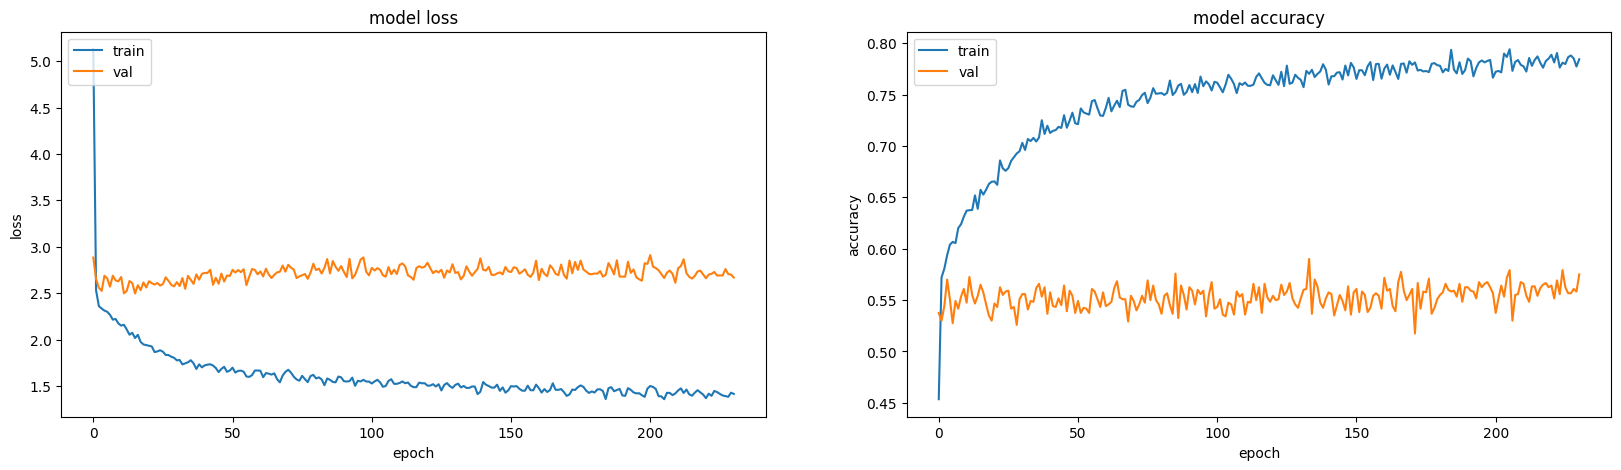

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_230/assets
282/282 [==============================] - 60s 213ms/step - loss: 1.4139 - accuracy: 0.7843 - val_loss: 2.6686 - val_accuracy: 0.5750
Epoch 232/401
282/282 [==============================] - 13s 45ms/step - loss: 1.4476 - accuracy: 0.7799 - val_loss: 2.7727 - val_accuracy: 0.5483
Epoch 233/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4932 - accuracy: 0.7746 - val_loss: 2.6666 - val_accuracy: 0.5883
Epoch 234/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3980 - accuracy: 0.7915 - val_loss: 2.7918 - val_accuracy: 0.5600
Epoch 235/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3791 - accuracy: 0.7877 - val_loss: 2.6424 - val_accuracy: 0.5750
Epoch 236/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4032 - accuracy: 0.7806 - val_loss: 2.6859 - val_accura

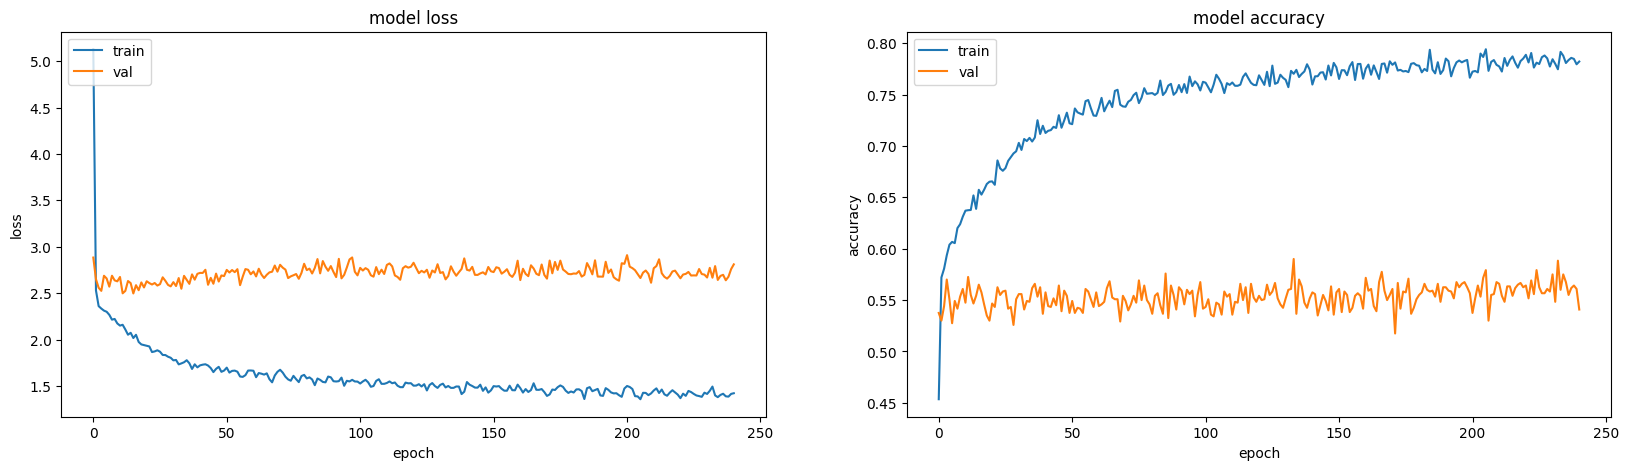

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_240/assets
282/282 [==============================] - 60s 212ms/step - loss: 1.4215 - accuracy: 0.7821 - val_loss: 2.8103 - val_accuracy: 0.5408
Epoch 242/401
282/282 [==============================] - 13s 45ms/step - loss: 1.4430 - accuracy: 0.7768 - val_loss: 2.6982 - val_accuracy: 0.5800
Epoch 243/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4017 - accuracy: 0.7887 - val_loss: 2.7889 - val_accuracy: 0.5567
Epoch 244/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4663 - accuracy: 0.7750 - val_loss: 2.7586 - val_accuracy: 0.5542
Epoch 245/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3926 - accuracy: 0.7898 - val_loss: 2.7432 - val_accuracy: 0.5600
Epoch 246/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3569 - accuracy: 0.7896 - val_loss: 2.7155 - val_accura

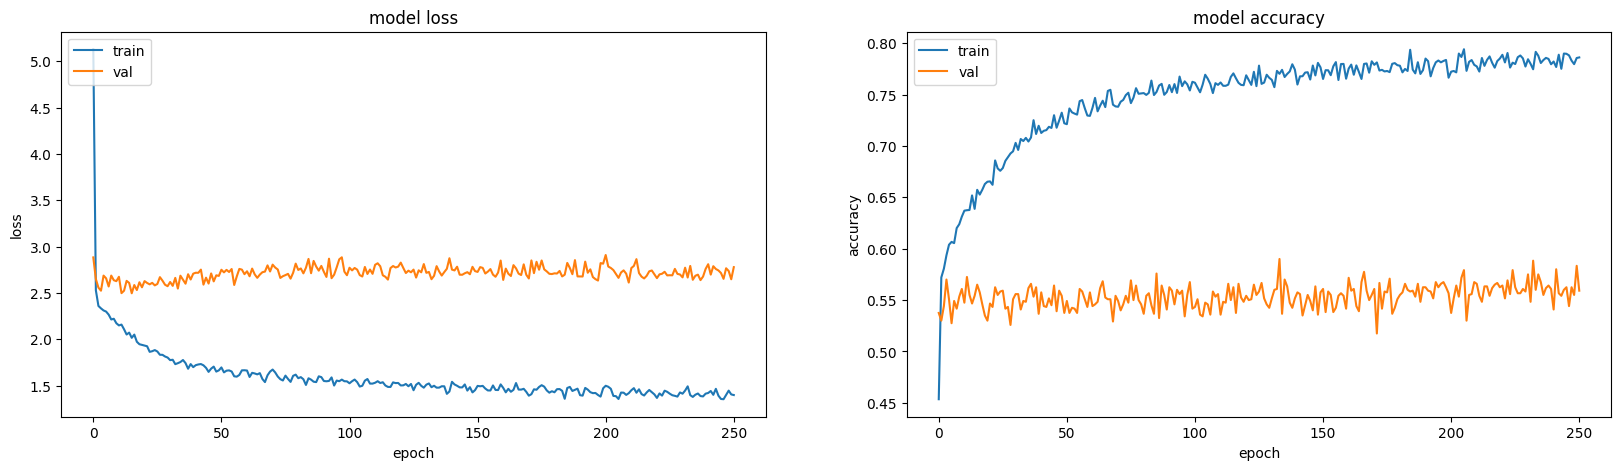

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_250/assets
282/282 [==============================] - 61s 218ms/step - loss: 1.3993 - accuracy: 0.7861 - val_loss: 2.7787 - val_accuracy: 0.5592
Epoch 252/401
282/282 [==============================] - 13s 45ms/step - loss: 1.3908 - accuracy: 0.7859 - val_loss: 2.7098 - val_accuracy: 0.5725
Epoch 253/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3911 - accuracy: 0.7849 - val_loss: 2.6312 - val_accuracy: 0.5583
Epoch 254/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3636 - accuracy: 0.7854 - val_loss: 2.7052 - val_accuracy: 0.5617
Epoch 255/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4026 - accuracy: 0.7920 - val_loss: 2.7828 - val_accuracy: 0.5525
Epoch 256/401
282/282 [==============================] - 13s 45ms/step - loss: 1.4048 - accuracy: 0.7831 - val_loss: 2.7226 - val_accura

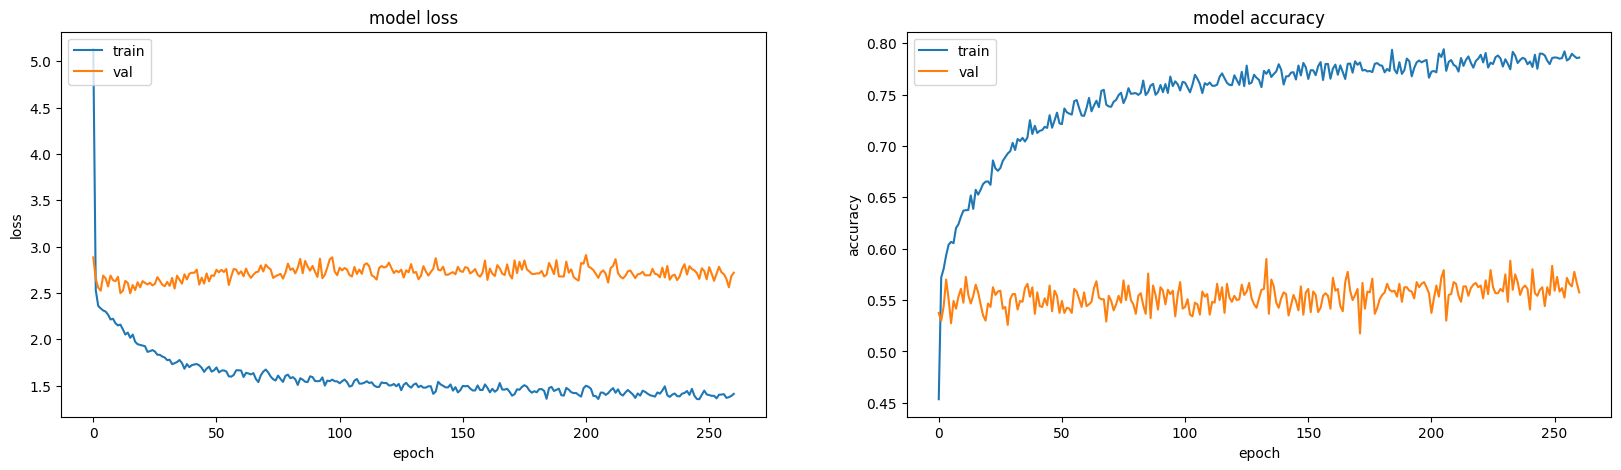

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_260/assets
282/282 [==============================] - 63s 223ms/step - loss: 1.4117 - accuracy: 0.7860 - val_loss: 2.7189 - val_accuracy: 0.5575
Epoch 262/401
282/282 [==============================] - 13s 46ms/step - loss: 1.4181 - accuracy: 0.7863 - val_loss: 2.7343 - val_accuracy: 0.5700
Epoch 263/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4103 - accuracy: 0.7826 - val_loss: 2.6462 - val_accuracy: 0.5633
Epoch 264/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4378 - accuracy: 0.7759 - val_loss: 2.7579 - val_accuracy: 0.5658
Epoch 265/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3949 - accuracy: 0.7871 - val_loss: 2.6104 - val_accuracy: 0.5683
Epoch 266/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4043 - accuracy: 0.7863 - val_loss: 2.6889 - val_accura

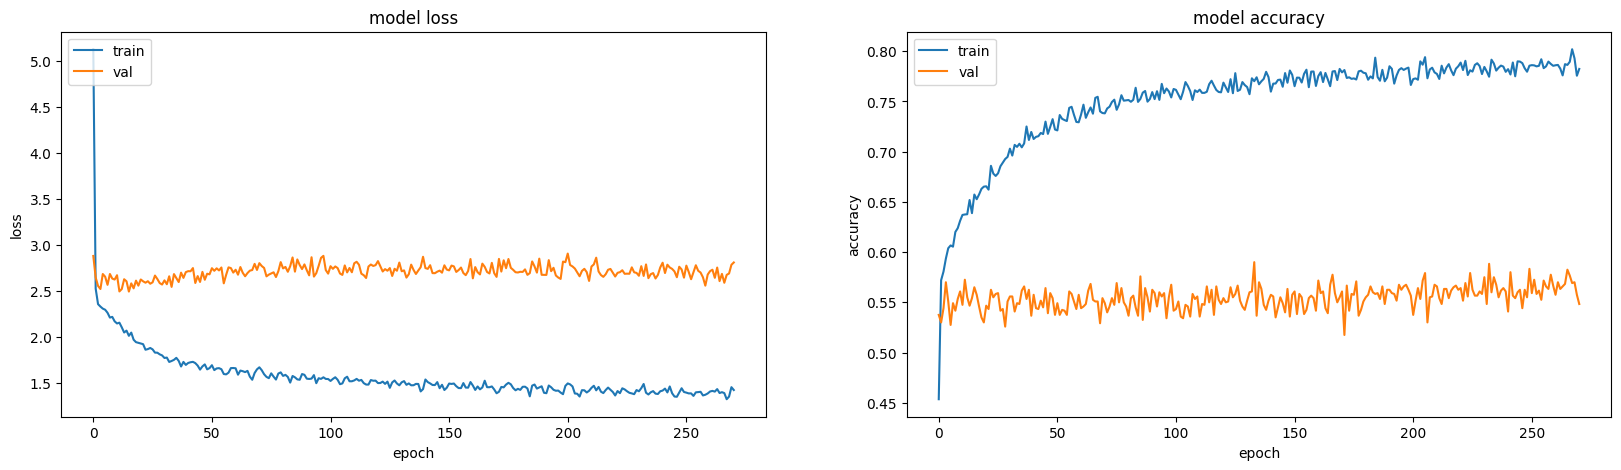

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_270/assets
282/282 [==============================] - 36s 127ms/step - loss: 1.4275 - accuracy: 0.7823 - val_loss: 2.8129 - val_accuracy: 0.5483
Epoch 272/401
282/282 [==============================] - 13s 45ms/step - loss: 1.4046 - accuracy: 0.7867 - val_loss: 2.7247 - val_accuracy: 0.5683
Epoch 273/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3698 - accuracy: 0.7863 - val_loss: 2.7060 - val_accuracy: 0.5733
Epoch 274/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3623 - accuracy: 0.7933 - val_loss: 2.7001 - val_accuracy: 0.5567
Epoch 275/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3817 - accuracy: 0.7920 - val_loss: 2.7135 - val_accuracy: 0.5692
Epoch 276/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3432 - accuracy: 0.7966 - val_loss: 2.7186 - val_accura

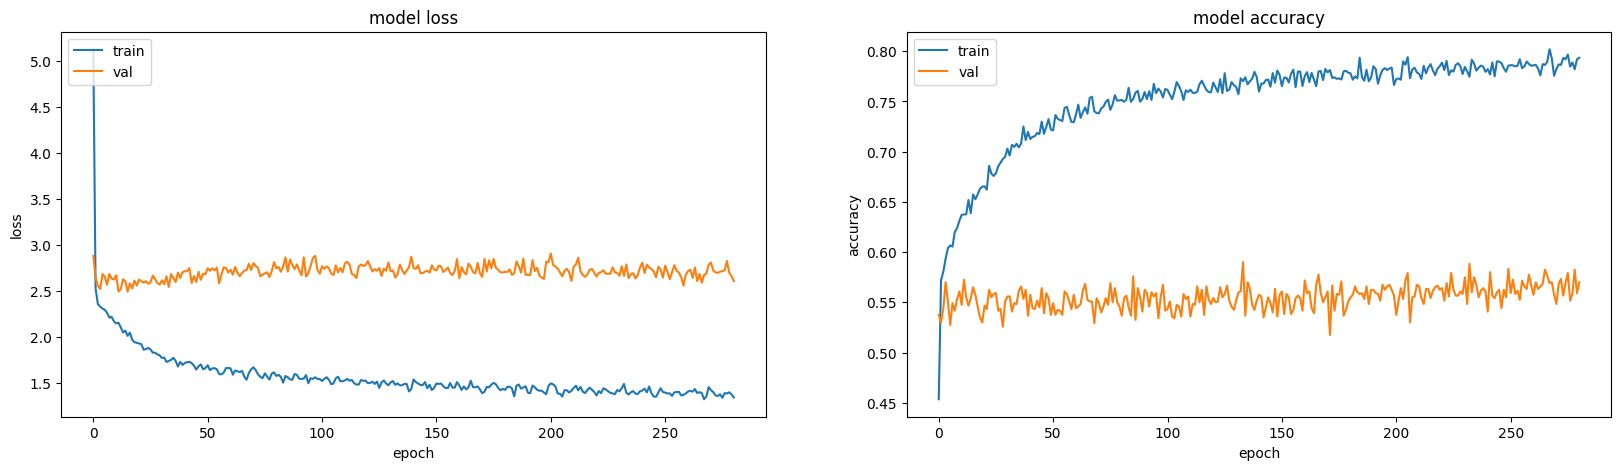

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_280/assets
282/282 [==============================] - 61s 216ms/step - loss: 1.3458 - accuracy: 0.7934 - val_loss: 2.6094 - val_accuracy: 0.5700
Epoch 282/401
282/282 [==============================] - 13s 44ms/step - loss: 1.4023 - accuracy: 0.7855 - val_loss: 2.7256 - val_accuracy: 0.5558
Epoch 283/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4510 - accuracy: 0.7813 - val_loss: 2.8750 - val_accuracy: 0.5525
Epoch 284/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4171 - accuracy: 0.7819 - val_loss: 2.7094 - val_accuracy: 0.5833
Epoch 285/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3256 - accuracy: 0.7989 - val_loss: 2.6077 - val_accuracy: 0.5692
Epoch 286/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3538 - accuracy: 0.7959 - val_loss: 2.7425 - val_accura

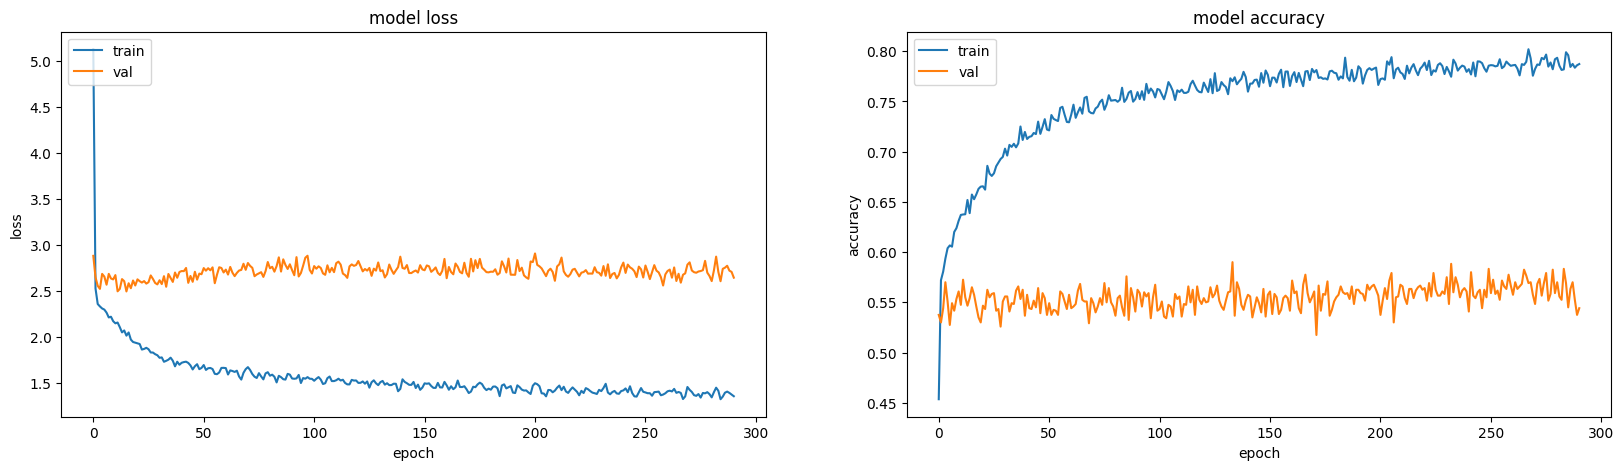

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_290/assets
282/282 [==============================] - 60s 214ms/step - loss: 1.3582 - accuracy: 0.7872 - val_loss: 2.6467 - val_accuracy: 0.5442
Epoch 292/401
282/282 [==============================] - 13s 45ms/step - loss: 1.3400 - accuracy: 0.8006 - val_loss: 2.5419 - val_accuracy: 0.5842
Epoch 293/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3716 - accuracy: 0.7917 - val_loss: 2.8143 - val_accuracy: 0.5408
Epoch 294/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4057 - accuracy: 0.7825 - val_loss: 2.6605 - val_accuracy: 0.5767
Epoch 295/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4316 - accuracy: 0.7820 - val_loss: 2.6690 - val_accuracy: 0.5683
Epoch 296/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4099 - accuracy: 0.7834 - val_loss: 2.6932 - val_accura

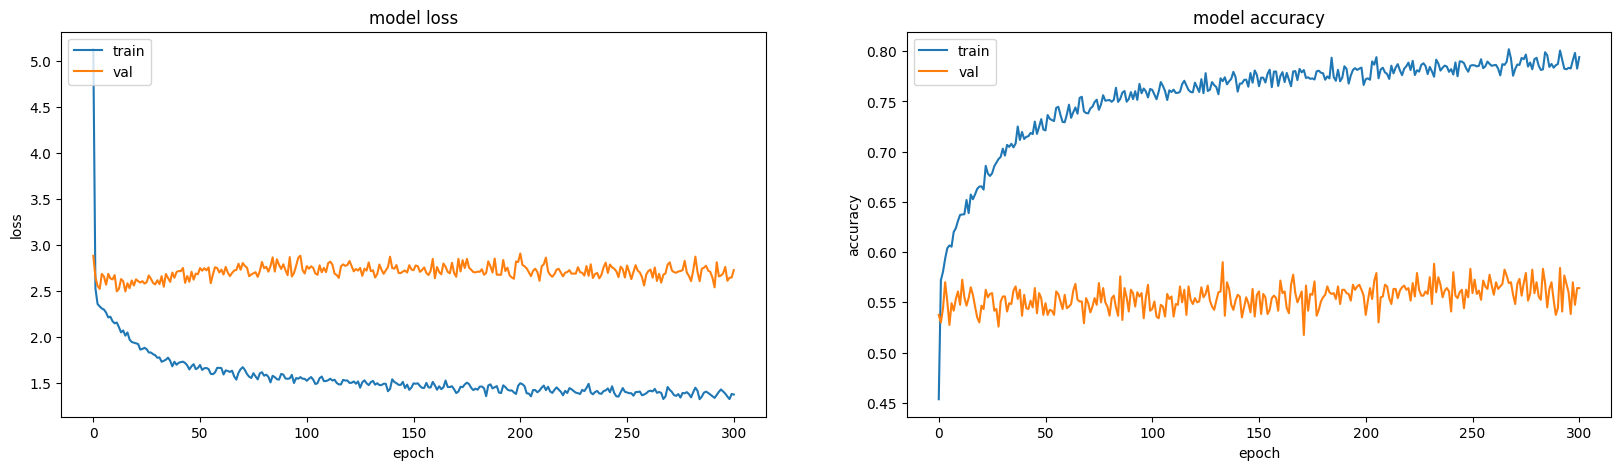

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_300/assets
282/282 [==============================] - 62s 220ms/step - loss: 1.3765 - accuracy: 0.7941 - val_loss: 2.7293 - val_accuracy: 0.5642
Epoch 302/401
282/282 [==============================] - 13s 45ms/step - loss: 1.3886 - accuracy: 0.7898 - val_loss: 2.7321 - val_accuracy: 0.5500
Epoch 303/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3945 - accuracy: 0.7869 - val_loss: 2.7138 - val_accuracy: 0.5592
Epoch 304/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3247 - accuracy: 0.7999 - val_loss: 2.6655 - val_accuracy: 0.5617
Epoch 305/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3751 - accuracy: 0.7930 - val_loss: 2.7662 - val_accuracy: 0.5617
Epoch 306/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3678 - accuracy: 0.7905 - val_loss: 2.6928 - val_accura

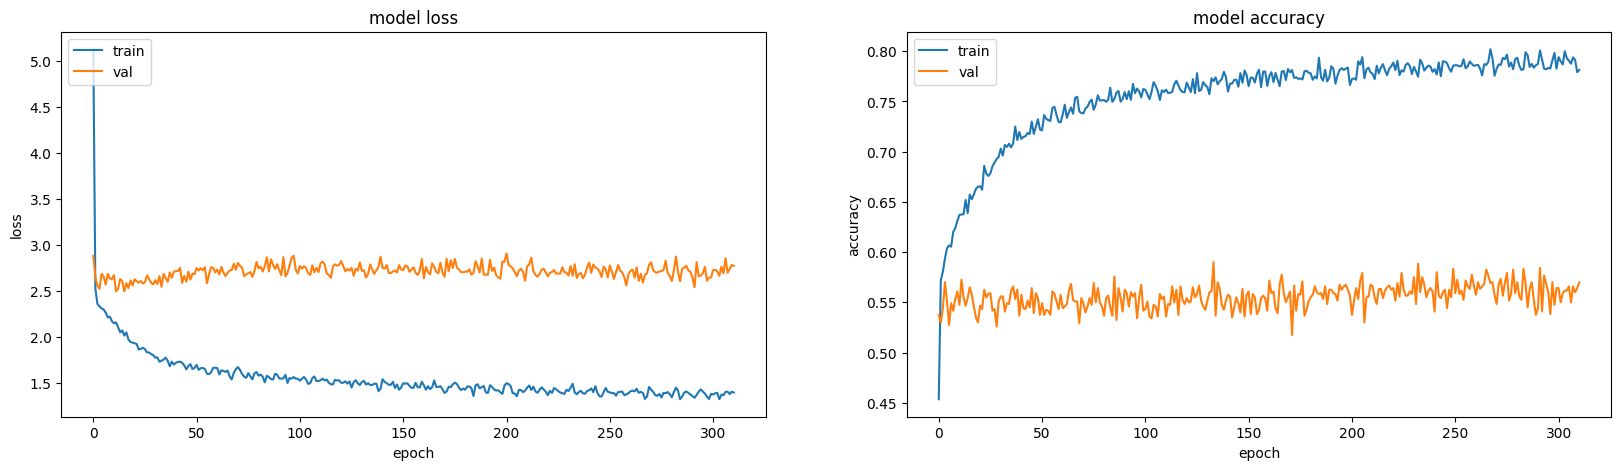

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_310/assets
282/282 [==============================] - 35s 126ms/step - loss: 1.3973 - accuracy: 0.7813 - val_loss: 2.7753 - val_accuracy: 0.5700
Epoch 312/401
282/282 [==============================] - 13s 45ms/step - loss: 1.3306 - accuracy: 0.8002 - val_loss: 2.6908 - val_accuracy: 0.5575
Epoch 313/401
282/282 [==============================] - 13s 45ms/step - loss: 1.3419 - accuracy: 0.7946 - val_loss: 2.7419 - val_accuracy: 0.5658
Epoch 314/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4030 - accuracy: 0.7880 - val_loss: 2.6986 - val_accuracy: 0.5492
Epoch 315/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3859 - accuracy: 0.7876 - val_loss: 2.6931 - val_accuracy: 0.5717
Epoch 316/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4135 - accuracy: 0.7880 - val_loss: 2.6915 - val_accura

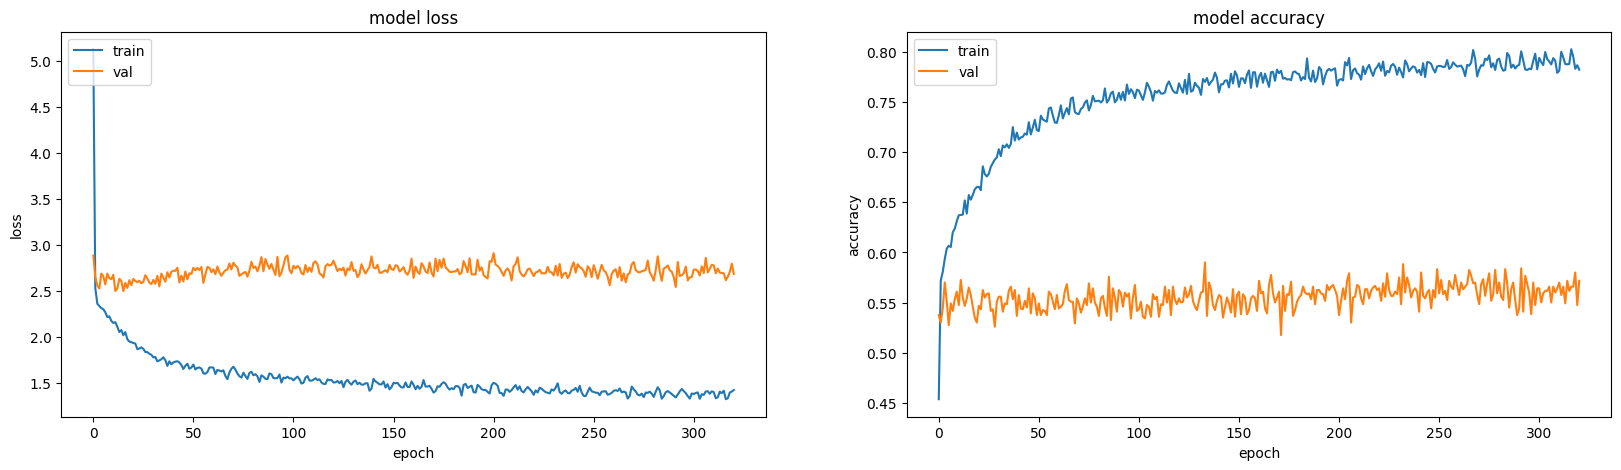

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_320/assets
282/282 [==============================] - 59s 209ms/step - loss: 1.4205 - accuracy: 0.7823 - val_loss: 2.6839 - val_accuracy: 0.5717
Epoch 322/401
282/282 [==============================] - 13s 45ms/step - loss: 1.3403 - accuracy: 0.7921 - val_loss: 2.7029 - val_accuracy: 0.5742
Epoch 323/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3617 - accuracy: 0.7901 - val_loss: 2.6939 - val_accuracy: 0.5567
Epoch 324/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3859 - accuracy: 0.7876 - val_loss: 2.7610 - val_accuracy: 0.5550
Epoch 325/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3896 - accuracy: 0.7886 - val_loss: 2.7430 - val_accuracy: 0.5758
Epoch 326/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3730 - accuracy: 0.7918 - val_loss: 2.7005 - val_accura

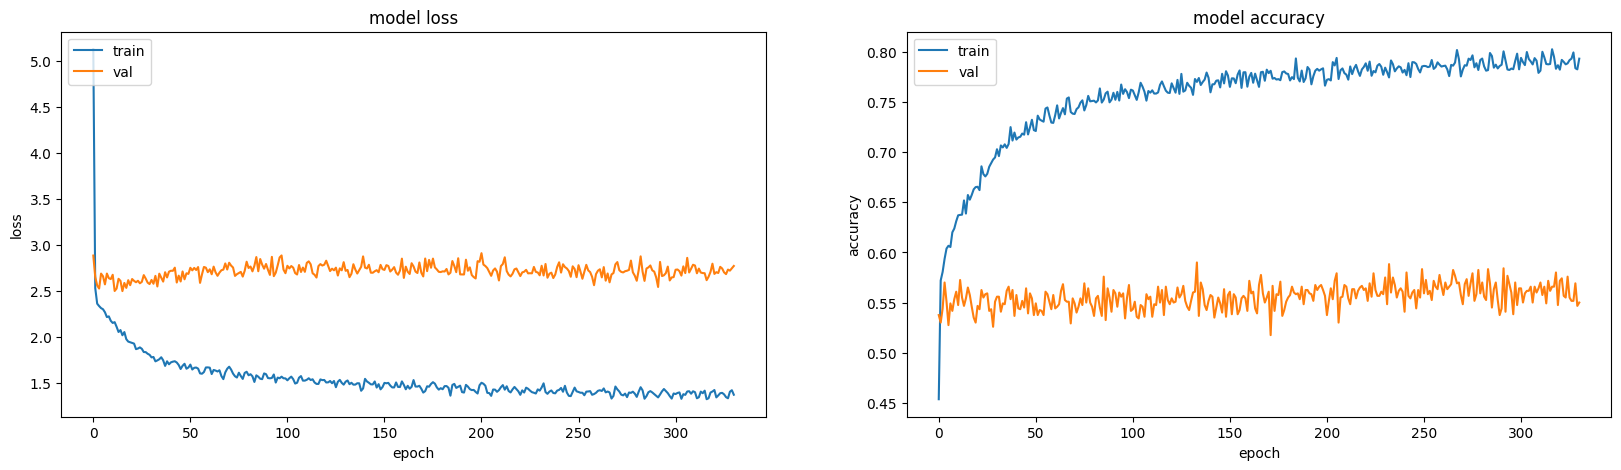

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_330/assets
282/282 [==============================] - 61s 215ms/step - loss: 1.3693 - accuracy: 0.7933 - val_loss: 2.7704 - val_accuracy: 0.5500
Epoch 332/401
282/282 [==============================] - 13s 46ms/step - loss: 1.3619 - accuracy: 0.7913 - val_loss: 2.7448 - val_accuracy: 0.5600
Epoch 333/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3465 - accuracy: 0.7941 - val_loss: 2.7032 - val_accuracy: 0.5717
Epoch 334/401
282/282 [==============================] - 13s 44ms/step - loss: 1.3344 - accuracy: 0.7928 - val_loss: 2.6976 - val_accuracy: 0.5675
Epoch 335/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3539 - accuracy: 0.7927 - val_loss: 2.7047 - val_accuracy: 0.5600
Epoch 336/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3445 - accuracy: 0.7945 - val_loss: 2.7743 - val_accura

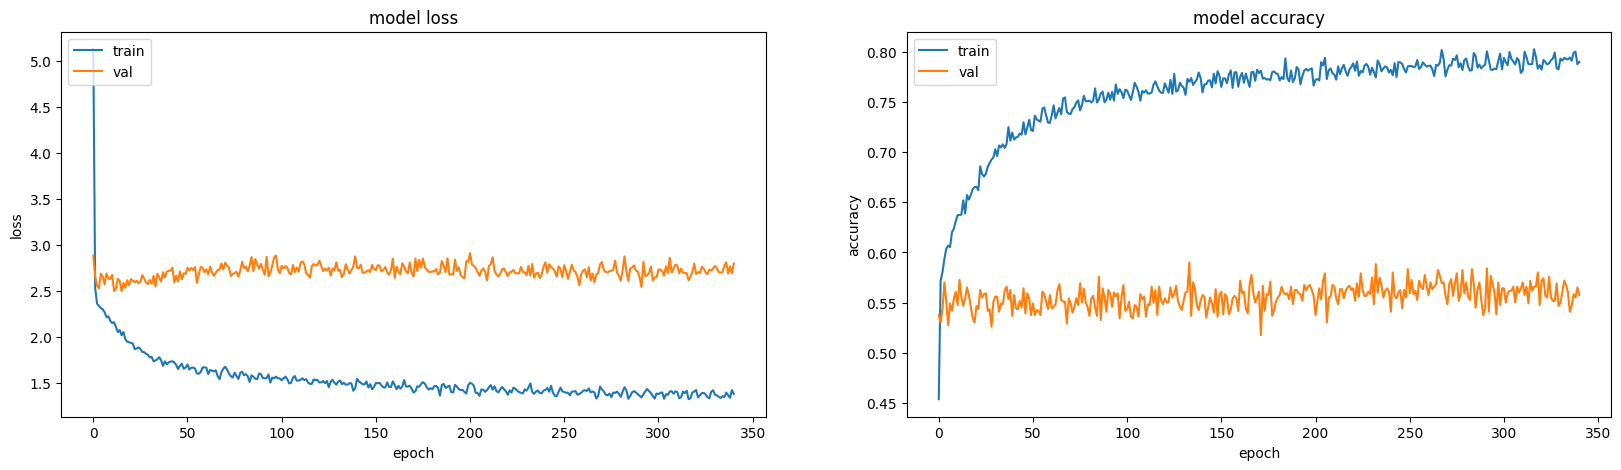

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_340/assets
282/282 [==============================] - 62s 220ms/step - loss: 1.3778 - accuracy: 0.7901 - val_loss: 2.7981 - val_accuracy: 0.5575
Epoch 342/401
282/282 [==============================] - 13s 45ms/step - loss: 1.4150 - accuracy: 0.7867 - val_loss: 2.8089 - val_accuracy: 0.5567
Epoch 343/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4249 - accuracy: 0.7863 - val_loss: 2.8400 - val_accuracy: 0.5608
Epoch 344/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3783 - accuracy: 0.7936 - val_loss: 2.6973 - val_accuracy: 0.5658
Epoch 345/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3134 - accuracy: 0.8029 - val_loss: 2.6219 - val_accuracy: 0.5667
Epoch 346/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3324 - accuracy: 0.7988 - val_loss: 2.7826 - val_accura

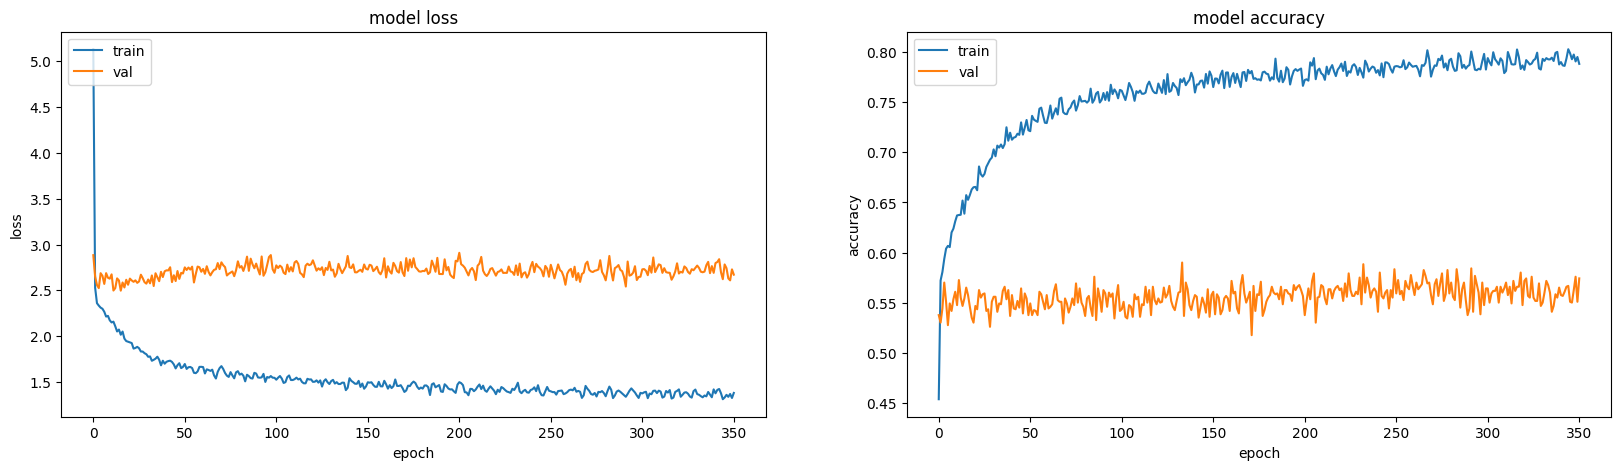

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_350/assets
282/282 [==============================] - 36s 128ms/step - loss: 1.3819 - accuracy: 0.7883 - val_loss: 2.6714 - val_accuracy: 0.5742
Epoch 352/401
282/282 [==============================] - 13s 45ms/step - loss: 1.3935 - accuracy: 0.7894 - val_loss: 2.6659 - val_accuracy: 0.5633
Epoch 353/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3558 - accuracy: 0.7911 - val_loss: 2.7431 - val_accuracy: 0.5492
Epoch 354/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3749 - accuracy: 0.7896 - val_loss: 2.7685 - val_accuracy: 0.5533
Epoch 355/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3833 - accuracy: 0.7928 - val_loss: 2.7839 - val_accuracy: 0.5500
Epoch 356/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3555 - accuracy: 0.7943 - val_loss: 2.6971 - val_accura

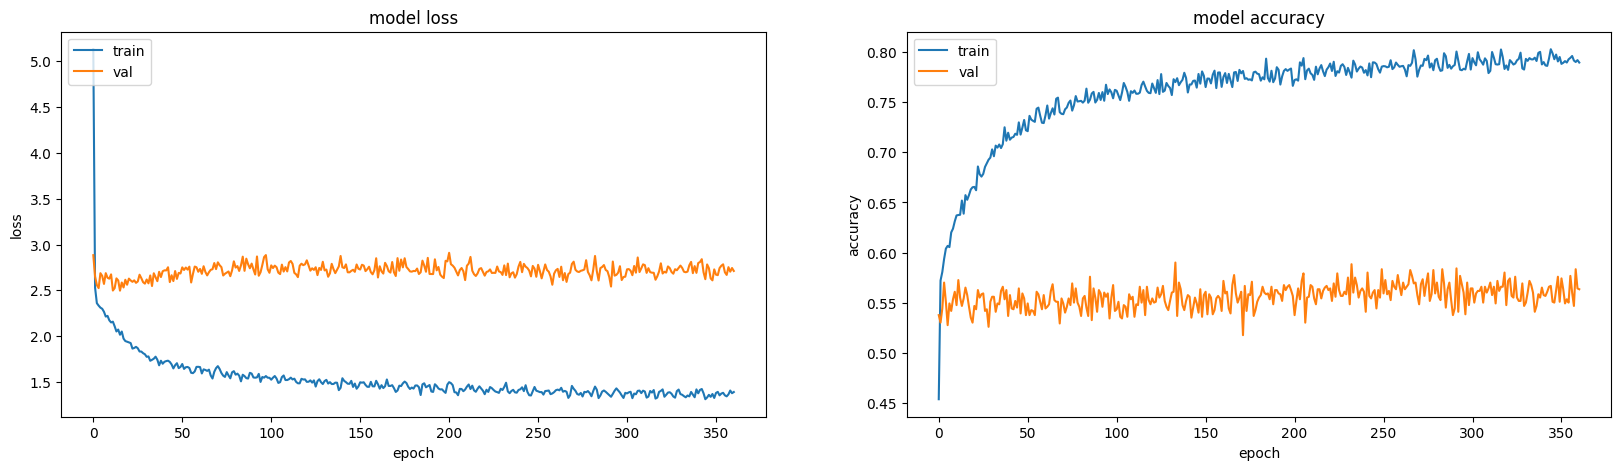

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_360/assets
282/282 [==============================] - 62s 219ms/step - loss: 1.3919 - accuracy: 0.7896 - val_loss: 2.7116 - val_accuracy: 0.5633
Epoch 362/401
282/282 [==============================] - 13s 45ms/step - loss: 1.3335 - accuracy: 0.7971 - val_loss: 2.6293 - val_accuracy: 0.5767
Epoch 363/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3590 - accuracy: 0.7959 - val_loss: 2.6843 - val_accuracy: 0.5608
Epoch 364/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3301 - accuracy: 0.8010 - val_loss: 2.6637 - val_accuracy: 0.5675
Epoch 365/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3075 - accuracy: 0.7997 - val_loss: 2.6484 - val_accuracy: 0.5658
Epoch 366/401
282/282 [==============================] - 12s 43ms/step - loss: 1.4060 - accuracy: 0.7829 - val_loss: 2.7726 - val_accura

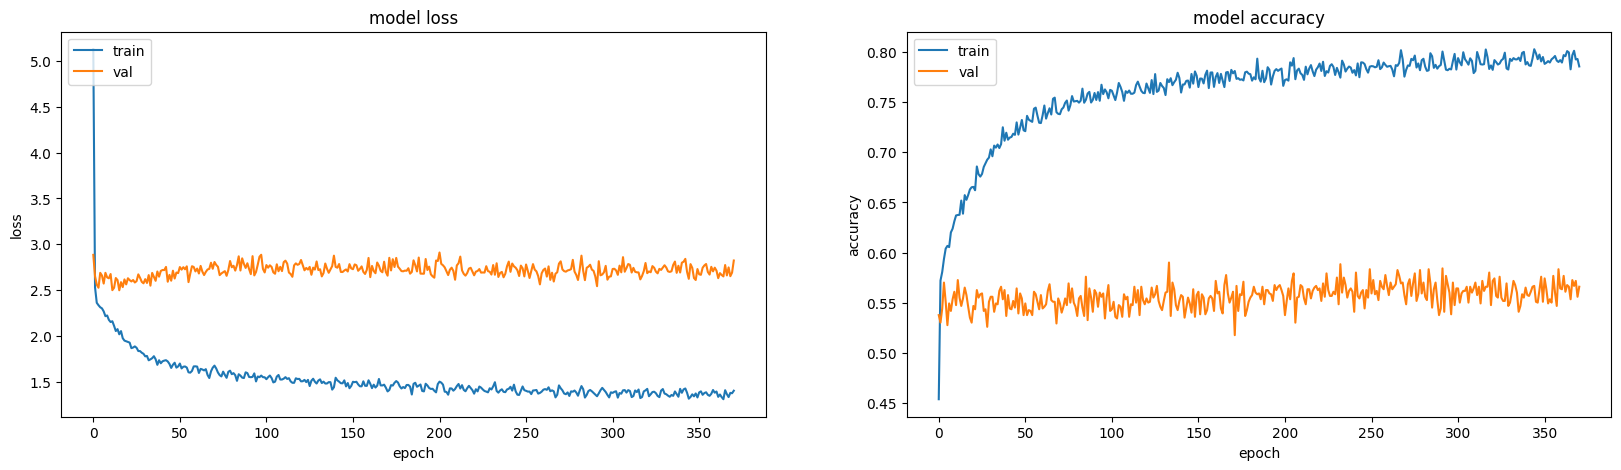

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_370/assets
282/282 [==============================] - 62s 222ms/step - loss: 1.4005 - accuracy: 0.7857 - val_loss: 2.8219 - val_accuracy: 0.5658
Epoch 372/401
282/282 [==============================] - 13s 46ms/step - loss: 1.4352 - accuracy: 0.7819 - val_loss: 2.7593 - val_accuracy: 0.5692
Epoch 373/401
282/282 [==============================] - 13s 45ms/step - loss: 1.3759 - accuracy: 0.7927 - val_loss: 2.6721 - val_accuracy: 0.5725
Epoch 374/401
282/282 [==============================] - 12s 44ms/step - loss: 1.4089 - accuracy: 0.7823 - val_loss: 2.6309 - val_accuracy: 0.5608
Epoch 375/401
282/282 [==============================] - 13s 44ms/step - loss: 1.3607 - accuracy: 0.7898 - val_loss: 2.7090 - val_accuracy: 0.5725
Epoch 376/401
282/282 [==============================] - 12s 44ms/step - loss: 1.2881 - accuracy: 0.8060 - val_loss: 2.5629 - val_accura

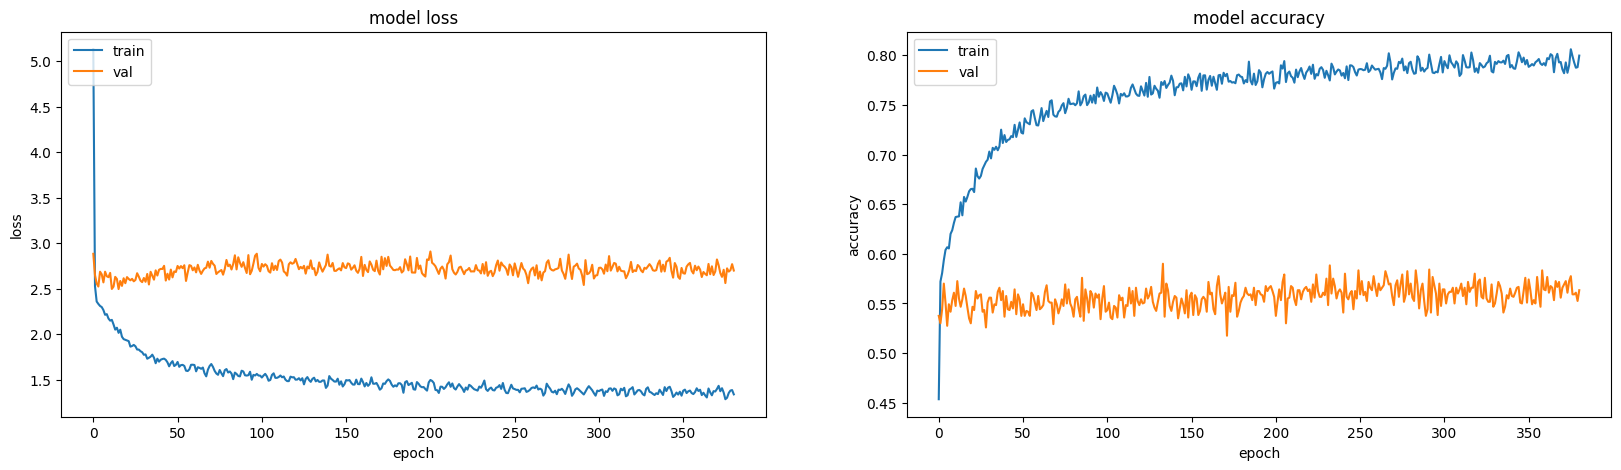

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_380/assets
282/282 [==============================] - 63s 226ms/step - loss: 1.3416 - accuracy: 0.7996 - val_loss: 2.7003 - val_accuracy: 0.5633
Epoch 382/401
282/282 [==============================] - 13s 45ms/step - loss: 1.3579 - accuracy: 0.7898 - val_loss: 2.6728 - val_accuracy: 0.5683
Epoch 383/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3792 - accuracy: 0.7864 - val_loss: 2.6947 - val_accuracy: 0.5708
Epoch 384/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3386 - accuracy: 0.8012 - val_loss: 2.6816 - val_accuracy: 0.5683
Epoch 385/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3648 - accuracy: 0.7901 - val_loss: 2.7305 - val_accuracy: 0.5450
Epoch 386/401
282/282 [==============================] - 12s 43ms/step - loss: 1.3394 - accuracy: 0.7976 - val_loss: 2.7382 - val_accura

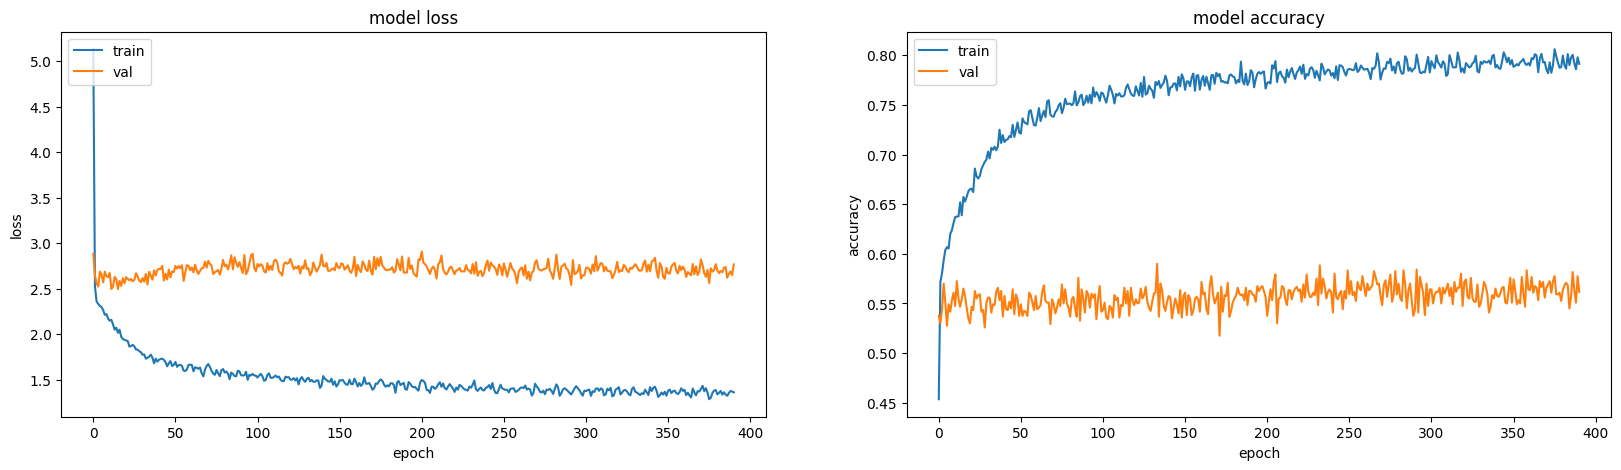

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_390/assets
282/282 [==============================] - 36s 127ms/step - loss: 1.3634 - accuracy: 0.7913 - val_loss: 2.7676 - val_accuracy: 0.5617
Epoch 392/401
282/282 [==============================] - 13s 46ms/step - loss: 1.3850 - accuracy: 0.7928 - val_loss: 2.6673 - val_accuracy: 0.5700
Epoch 393/401
282/282 [==============================] - 13s 45ms/step - loss: 1.3435 - accuracy: 0.7943 - val_loss: 2.6817 - val_accuracy: 0.5542
Epoch 394/401
282/282 [==============================] - 13s 44ms/step - loss: 1.3030 - accuracy: 0.7983 - val_loss: 2.6446 - val_accuracy: 0.5692
Epoch 395/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3080 - accuracy: 0.7975 - val_loss: 2.7536 - val_accuracy: 0.5617
Epoch 396/401
282/282 [==============================] - 12s 44ms/step - loss: 1.3964 - accuracy: 0.7898 - val_loss: 2.7075 - val_accura

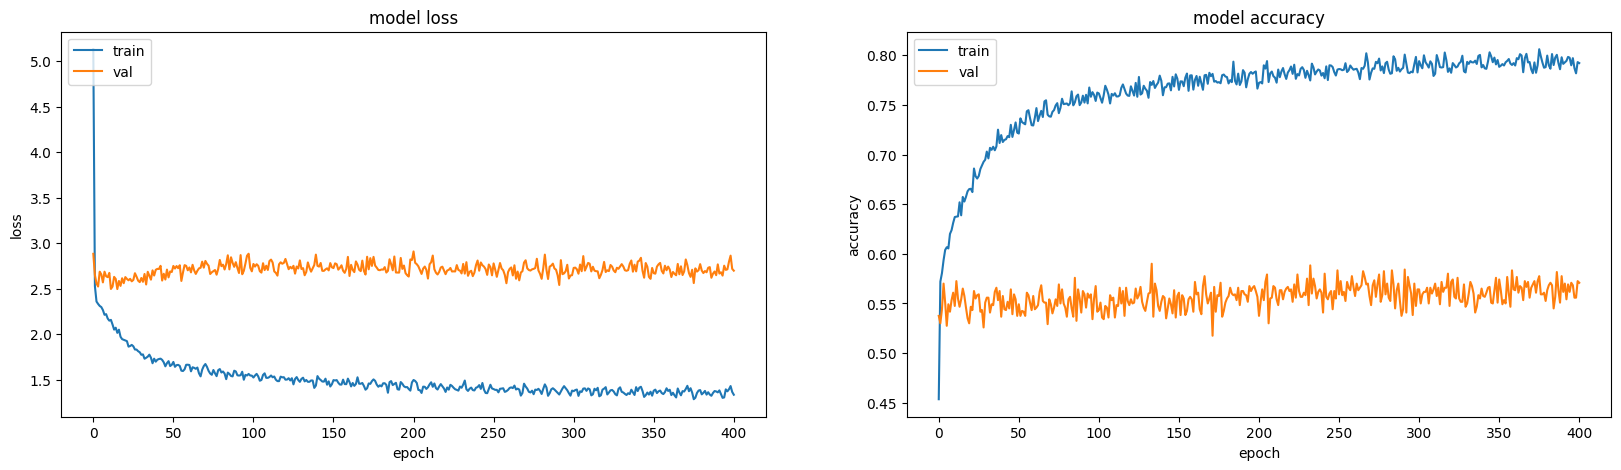

INFO:tensorflow:Assets written to: /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_400/assets
282/282 [==============================] - 63s 225ms/step - loss: 1.3375 - accuracy: 0.7921 - val_loss: 2.6989 - val_accuracy: 0.5708


In [20]:

for m in models_data[0:1]:
    rename_model(m[0])
    base_model = m[1](
        include_top=False,
        weights='imagenet',
        input_shape= (IMG_SIZE, IMG_SIZE, NUM_CHANNELS)
    )

    base_model.trainable = False

    input = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, NUM_CHANNELS))

    pre_process_layer = m[2](input, data_format=None)

    layer = base_model(pre_process_layer, training=False)
    layer = tf.keras.layers.GlobalAveragePooling2D()(layer)
    
    layer = tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.01))(layer)
    layer = tf.keras.layers.Dropout(0.4)(layer)
    layer = tf.keras.layers.Dense(512)(layer)
    output = tf.keras.layers.Dense(NUM_CLASS, activation='softmax')(layer)

    model = tf.keras.Model(input, output)

    model.summary()
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )
    epochs = 401
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[real_time_callback()])


In [29]:
## Max validations
models_dir = os.listdir(os.path.join(os.getcwd(), 'd-1024-do-4','history'))
models_dir = [x for x in models_dir if x[-1] not in ['t', 's']]
df = [pd.read_csv(os.path.join(os.getcwd(), 'd-1024-do-4','history', x), index_col=0) for x in models_dir]
max_val = [x[x[' validation_accuracy'] == x[' validation_accuracy'].max()] for x in df]
[print(max_val[i], models_dir[i]) for i in range(len(models_dir))]

        accuracy   validation_accuracy     loss   validation_loss
epoch                                                            
77       0.94814              0.551667  1.06032         33.021217 model_Xception.csv
        accuracy   validation_accuracy     loss   validation_loss
epoch                                                            
42      0.949491              0.518333  0.28537          9.733346 model_EfficientNetB5.csv
        accuracy   validation_accuracy      loss   validation_loss
epoch                                                             
62      0.911141              0.461667  3.943418         89.294754 model_Inceptionv3.csv
        accuracy   validation_accuracy      loss   validation_loss
epoch                                                             
64      0.975473              0.623333  0.190377         10.607005 model_EfficientNetB0.csv
        accuracy   validation_accuracy      loss   validation_loss
epoch                                       

[None, None, None, None, None]

In [33]:
## Last model
models_dir = os.listdir(os.path.join(os.getcwd(), 'd-1024-do-4','history'))
models_dir = [x for x in models_dir if x[-1] not in ['t', 's']]
df = [pd.read_csv(os.path.join(os.getcwd(), 'd-1024-do-4','history', x), index_col=0) for x in models_dir]
max_val = [x.iloc[100,:] for x in df]
[print(max_val[i], models_dir[i]) for i in range(len(models_dir))]

 accuracy                0.964353
 validation_accuracy     0.523333
 loss                    0.851043
 validation_loss        44.856438
Name: 100, dtype: float64 model_Xception.csv
 accuracy                0.972043
 validation_accuracy     0.478333
 loss                    0.341304
 validation_loss        22.173059
Name: 100, dtype: float64 model_EfficientNetB5.csv
 accuracy                 0.945230
 validation_accuracy      0.420000
 loss                     3.579228
 validation_loss        149.472916
Name: 100, dtype: float64 model_Inceptionv3.csv
 accuracy                0.984099
 validation_accuracy     0.585000
 loss                    0.169474
 validation_loss        15.809146
Name: 100, dtype: float64 model_EfficientNetB0.csv
 accuracy                 0.920287
 validation_accuracy      0.471667
 loss                     5.464262
 validation_loss        133.533539
Name: 100, dtype: float64 model_VGG19.csv


[None, None, None, None, None]